# Exploratory Data Analysis: Gold Price Forecasting Dataset

## Data Collection and Source
- Dataset loaded from local CSV `gold_price_forecasting_dataset.csv`.
- The file contains precomputed technical indicators; document the upstream market data provider and preprocessing pipeline if this project is published.

## Data Cleaning and Preprocessing (Summary)
- Dates are parsed to datetime, missing values are checked, and engineered features are validated for analysis.


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

file_path = "gold_price_forecasting_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,date,adj close,close,high,low,open,volume,ma_7,ma_30,ma_90,daily_return,volatility_7,volatility_30,rsi,macd,macd_signal,bb_upper,bb_lower
0,2021-06-11,1877.400024,1877.400024,1902.300049,1875.199951,1900.900024,349,1887.828561,1860.180005,1790.618891,-0.008869,0.009353,0.007538,54.722931,19.724030,24.933953,1918.242879,1853.797124
1,2021-06-14,1864.000000,1864.000000,1866.599976,1846.500000,1866.199951,41,1886.799997,1863.403337,1790.972225,-0.007138,0.006411,0.007711,49.391919,16.433420,23.233846,1913.119794,1861.530206
2,2021-06-15,1854.500000,1854.500000,1867.199951,1854.400024,1866.400024,78,1881.757132,1865.506669,1791.701114,-0.005097,0.004572,0.007474,45.972581,12.910196,21.169116,1914.969370,1858.380630
3,2021-06-16,1859.500000,1859.500000,1860.099976,1809.199951,1859.400024,117,1876.428554,1868.296667,1792.241113,0.002696,0.004348,0.007240,48.012515,10.401571,19.015607,1915.862799,1856.657196
4,2021-06-17,1773.800049,1773.800049,1823.300049,1769.599976,1811.800049,1135,1859.514282,1867.953337,1791.595558,-0.046088,0.016895,0.011288,28.293542,1.481124,15.508710,1938.202457,1823.567538


In [22]:

gold = df.copy()

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

gold["date"] = pd.to_datetime(gold["date"])

gold.head()

,date,adj close,close,high,low,open,volume,ma_7,ma_30,ma_90,daily_return,volatility_7,volatility_30,rsi,macd,macd_signal,bb_upper,bb_lower
0,2021-06-11,1877.400024,1877.400024,1902.300049,1875.199951,1900.900024,349,1887.828561,1860.180005,1790.618891,-0.008869,0.009353,0.007538,54.722931,19.724030,24.933953,1918.242879,1853.797124
1,2021-06-14,1864.000000,1864.000000,1866.599976,1846.500000,1866.199951,41,1886.799997,1863.403337,1790.972225,-0.007138,0.006411,0.007711,49.391919,16.433420,23.233846,1913.119794,1861.530206
2,2021-06-15,1854.500000,1854.500000,1867.199951,1854.400024,1866.400024,78,1881.757132,1865.506669,1791.701114,-0.005097,0.004572,0.007474,45.972581,12.910196,21.169116,1914.969370,1858.380630
3,2021-06-16,1859.500000,1859.500000,1860.099976,1809.199951,1859.400024,117,1876.428554,1868.296667,1792.241113,0.002696,0.004348,0.007240,48.012515,10.401571,19.015607,1915.862799,1856.657196
4,2021-06-17,1773.800049,1773.800049,1823.300049,1769.599976,1811.800049,1135,1859.514282,1867.953337,1791.595558,-0.046088,0.016895,0.011288,28.293542,1.481124,15.508710,1938.202457,1823.567538


In [23]:

gold.info()


numeric_cols = gold.select_dtypes(include=[np.number]).columns
print("\nNumeric summary:")
if len(numeric_cols) > 0:
	print(gold[numeric_cols].describe())
else:
	print("No numeric columns found.")


object_cols = gold.select_dtypes(include=["object"]).columns
print("\nObject summary:")
if len(object_cols) > 0:
	print(gold[object_cols].describe())
else:
	print("No object columns found.")

# Missing values per column
print("\nMissing values per column:")
print(gold.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1167 non-null   datetime64[ns]
 1   adj close      1167 non-null   float64       
 2   close          1167 non-null   float64       
 3   high           1167 non-null   float64       
 4   low            1167 non-null   float64       
 5   open           1167 non-null   float64       
 6   volume         1167 non-null   int64         
 7   ma_7           1167 non-null   float64       
 8   ma_30          1167 non-null   float64       
 9   ma_90          1167 non-null   float64       
 10  daily_return   1167 non-null   float64       
 11  volatility_7   1167 non-null   float64       
 12  volatility_30  1167 non-null   float64       
 13  rsi            1167 non-null   float64       
 14  macd           1167 non-null   float64       
 15  macd_signal    1167 n

In [24]:
gold["hl_spread"] = gold["high"] - gold["low"]
gold["oc_change"] = gold["close"] - gold["open"]
gold["oc_return"] = gold["oc_change"] / gold["open"]
gold["range_pct"] = (gold["high"] - gold["low"]) / gold["open"]
gold["price_vs_ma7"] = gold["close"] - gold["ma_7"]
gold["price_vs_ma30"] = gold["close"] - gold["ma_30"]
gold["bb_width"] = gold["bb_upper"] - gold["bb_lower"]

gold["year"] = gold["date"].dt.year
gold["month"] = gold["date"].dt.month
gold["dayofweek"] = gold["date"].dt.dayofweek

gold[["close", "high", "low", "open", "hl_spread", "oc_change", "oc_return", "range_pct", "price_vs_ma7", "price_vs_ma30", "bb_width", "year", "month", "dayofweek"]].head()

,close,high,low,open,hl_spread,oc_change,oc_return,range_pct,price_vs_ma7,price_vs_ma30,bb_width,year,month,dayofweek
0,1877.400024,1902.300049,1875.199951,1900.900024,27.100098,-23.500000,-0.012363,0.014256,-10.428537,17.220020,64.445755,2021,6,4
1,1864.000000,1866.599976,1846.500000,1866.199951,20.099976,-2.199951,-0.001179,0.010771,-22.799997,0.596663,51.589588,2021,6,0
2,1854.500000,1867.199951,1854.400024,1866.400024,12.799927,-11.900024,-0.006376,0.006858,-27.257132,-11.006669,56.588741,2021,6,1
3,1859.500000,1860.099976,1809.199951,1859.400024,50.900024,0.099976,0.000054,0.027374,-16.928554,-8.796667,59.205603,2021,6,2
4,1773.800049,1823.300049,1769.599976,1811.800049,53.700073,-38.000000,-0.020974,0.029639,-85.714233,-94.153288,114.634919,2021,6,3


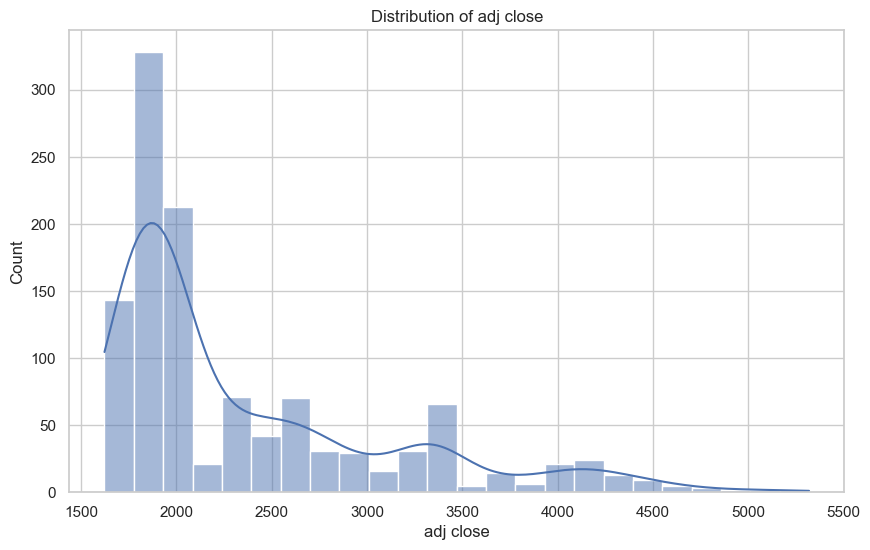

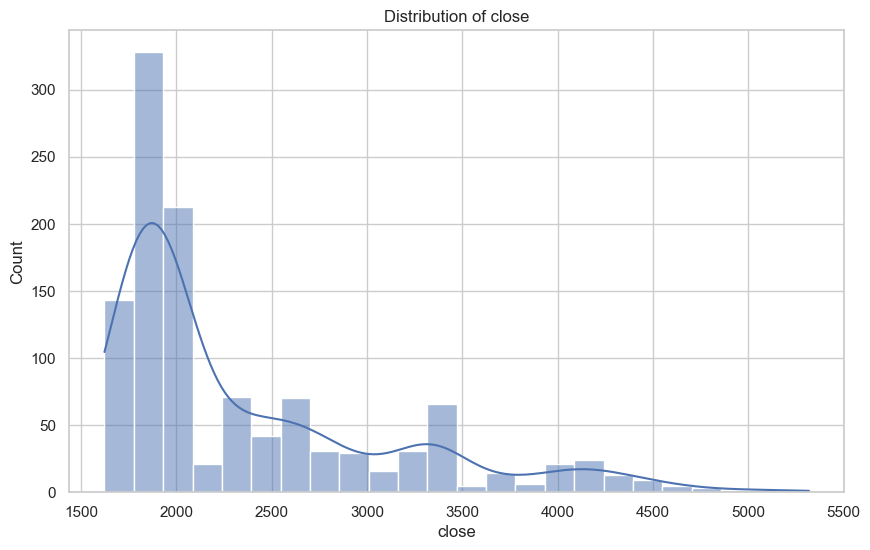

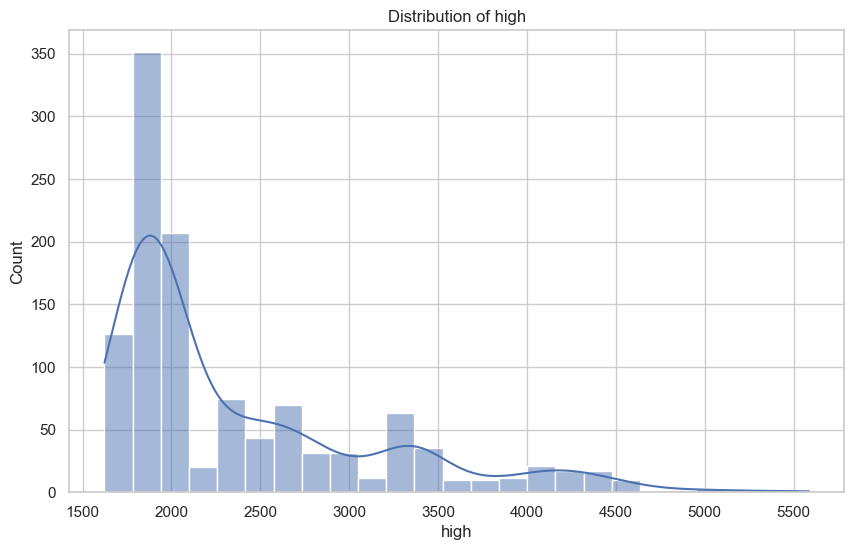

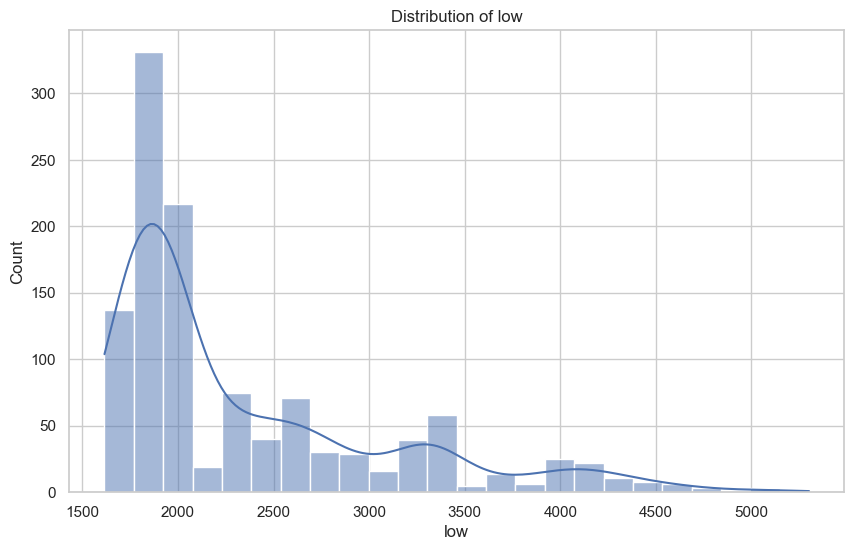

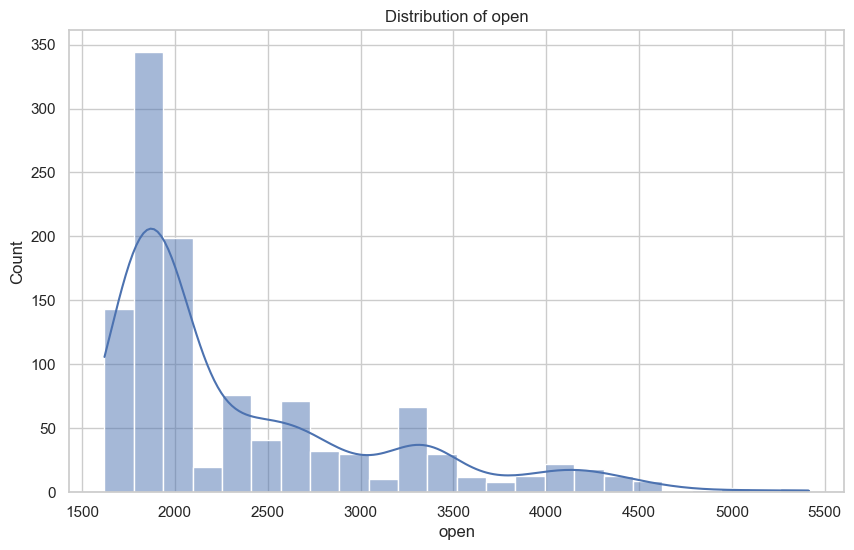

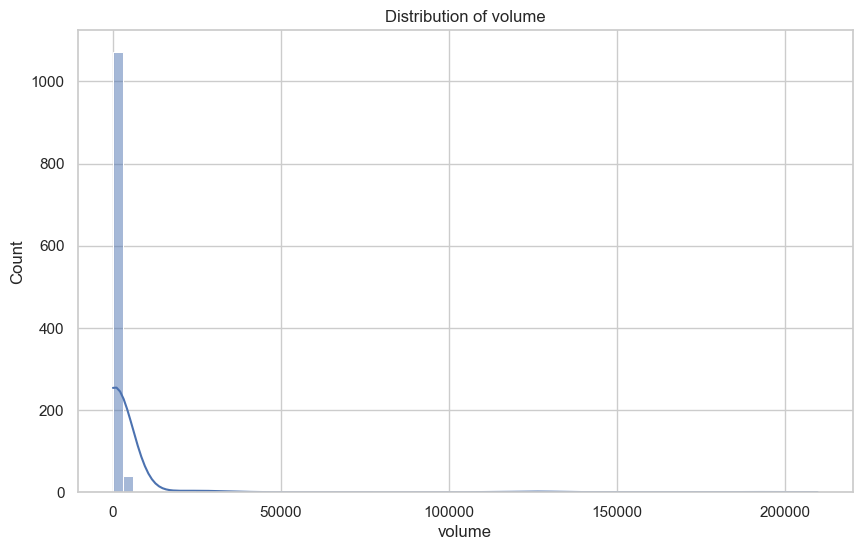

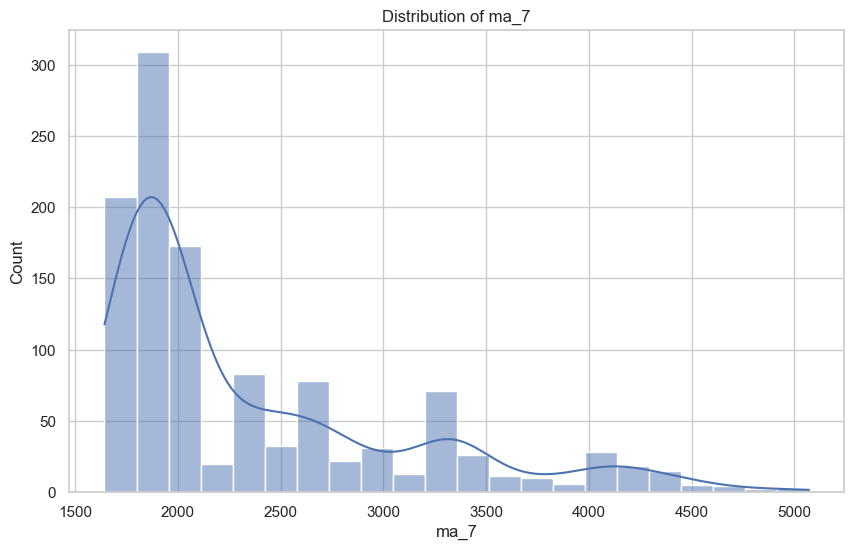

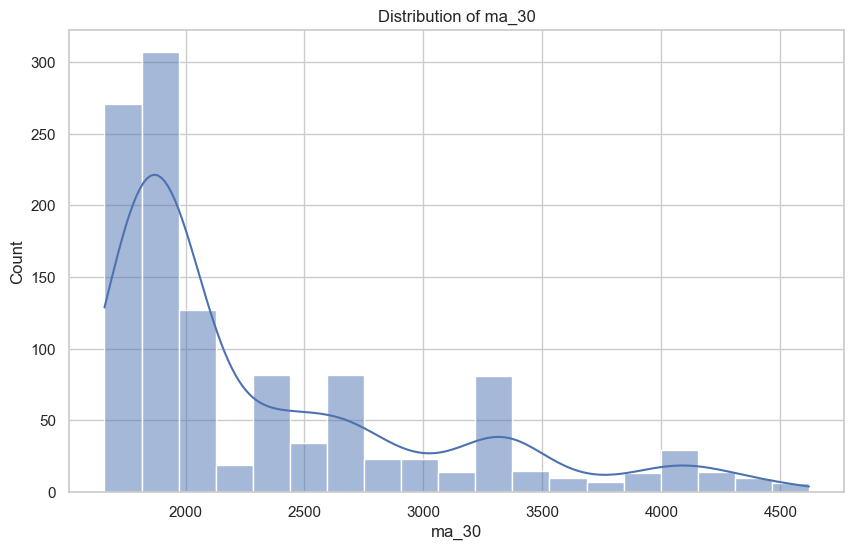

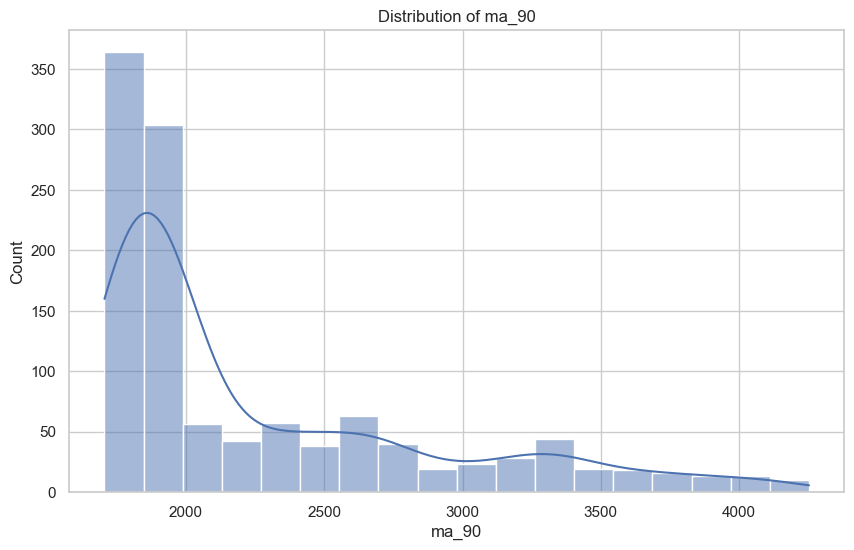

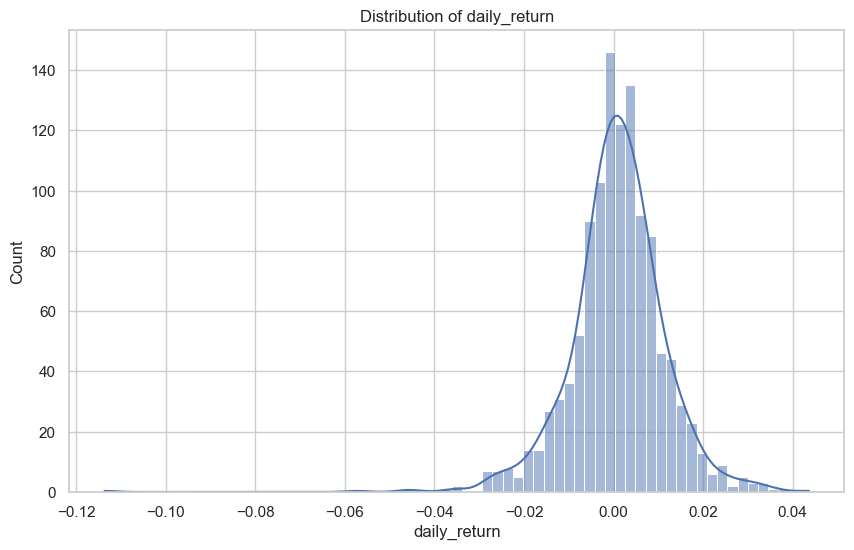

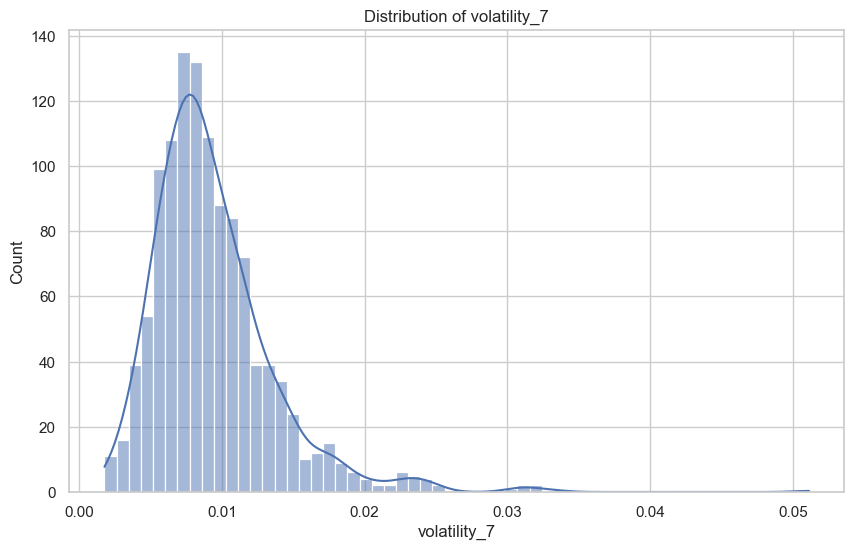

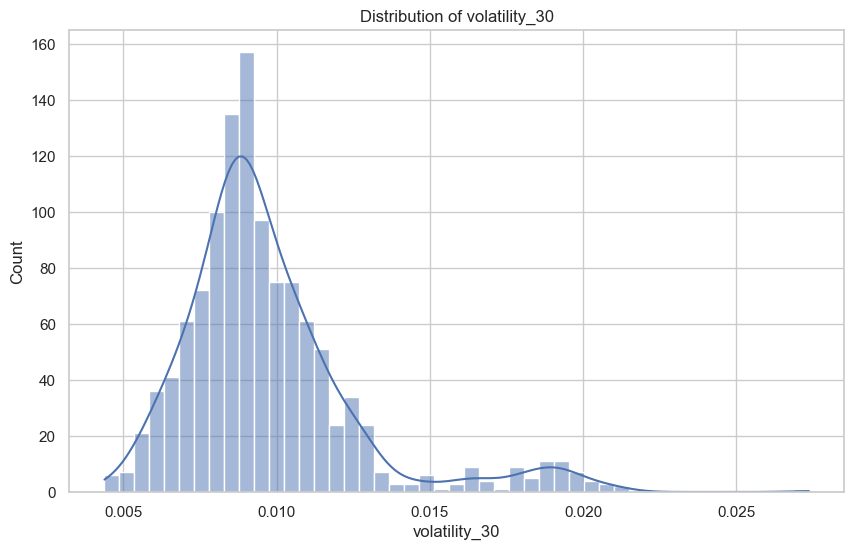

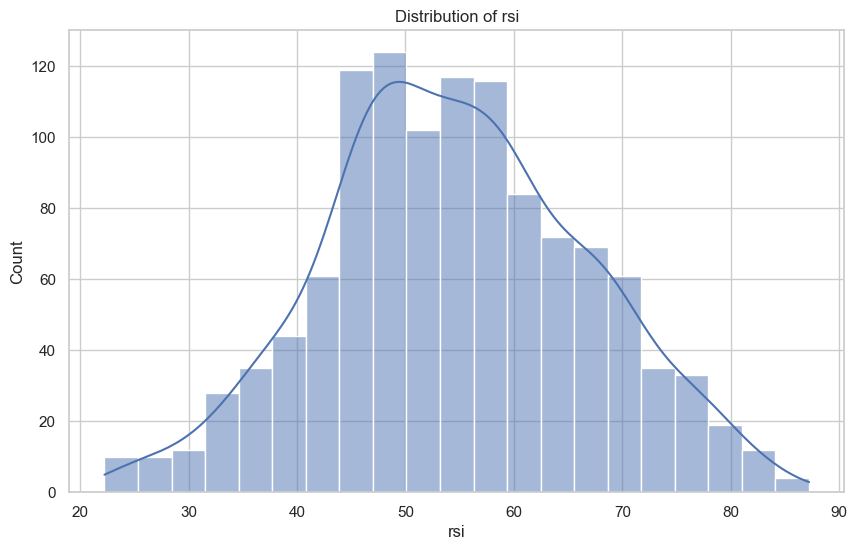

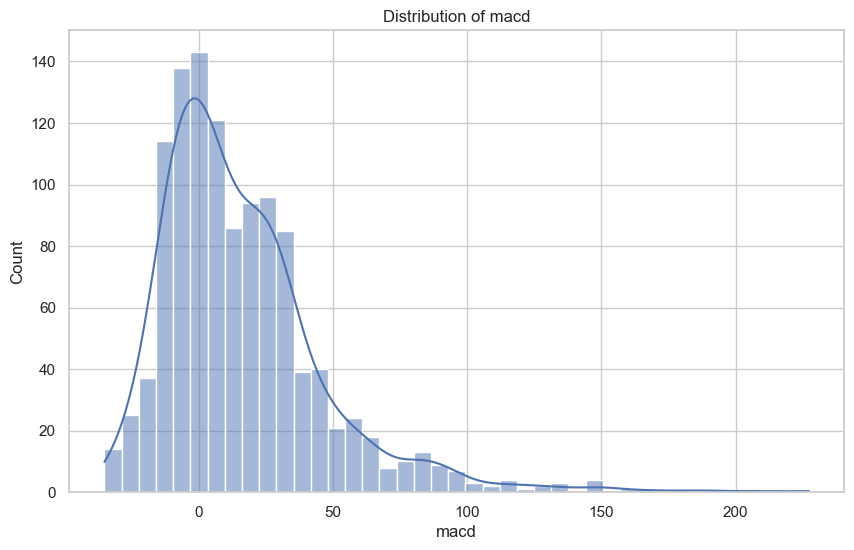

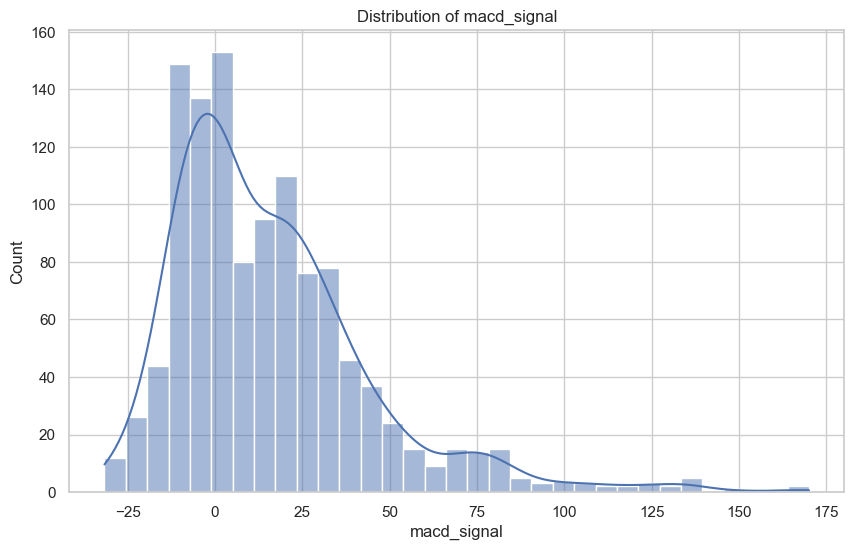

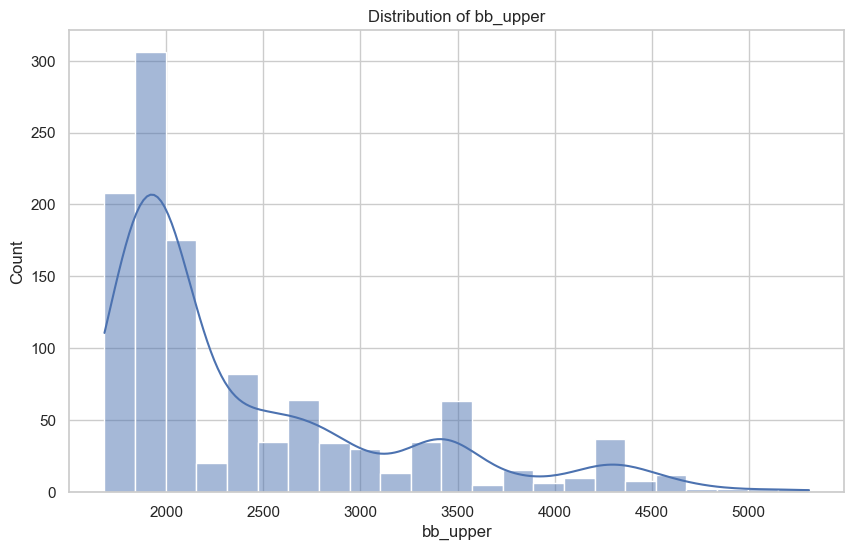

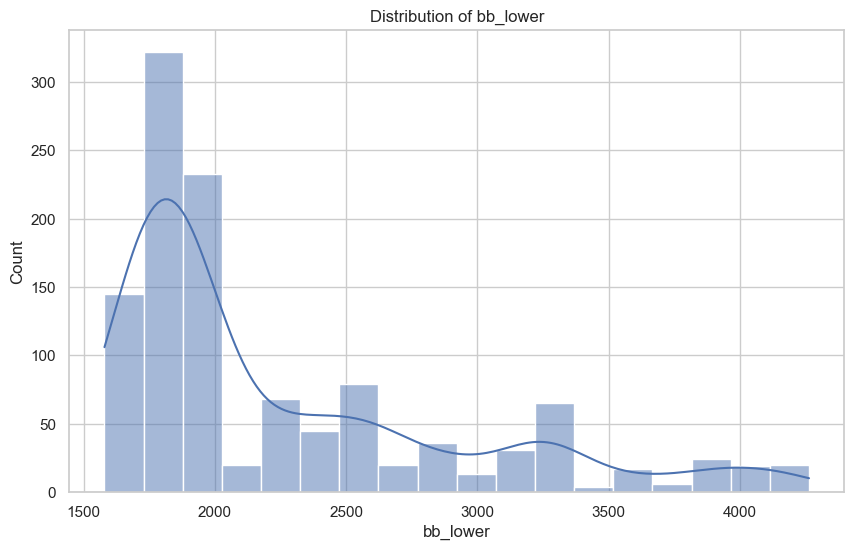

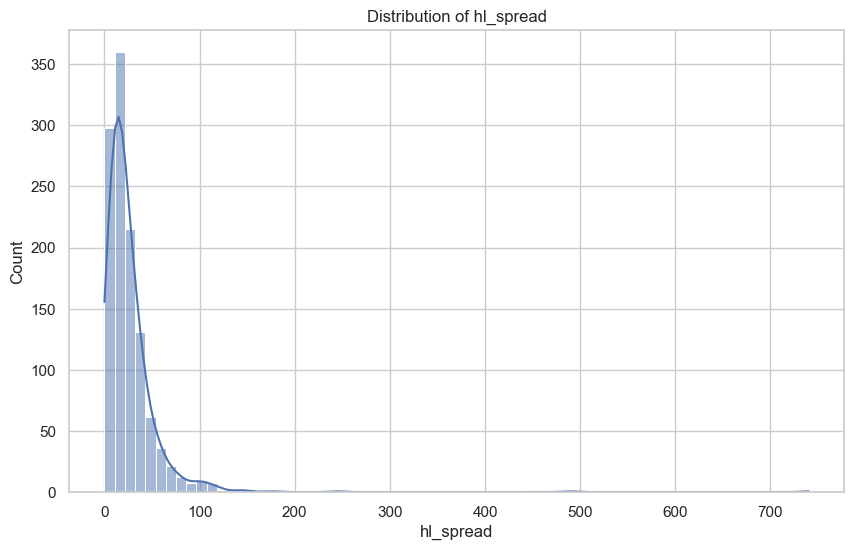

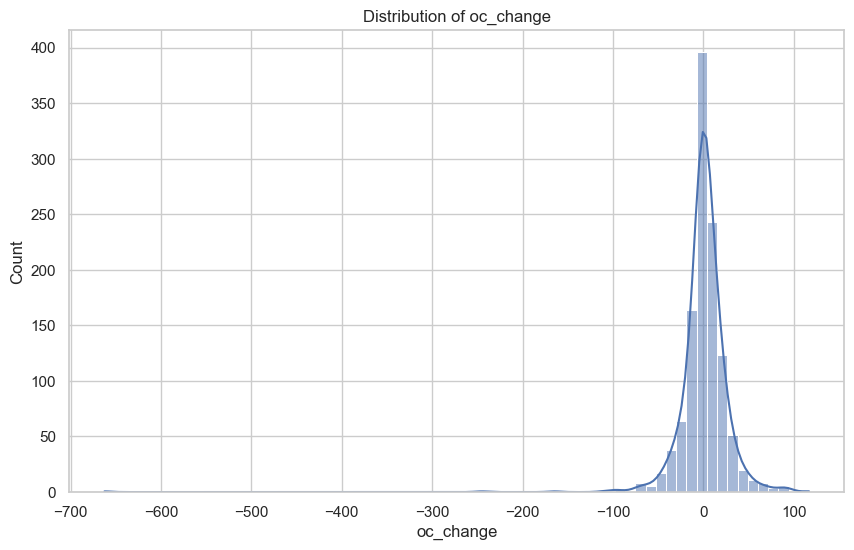

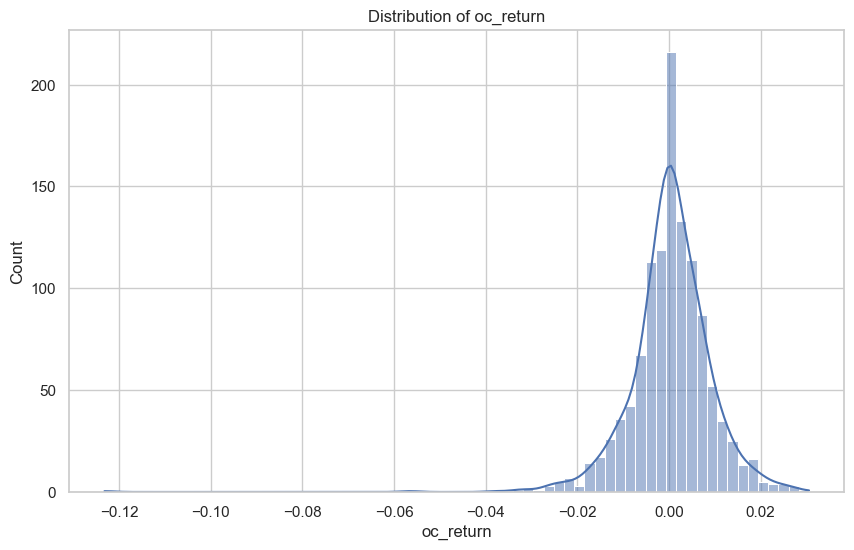

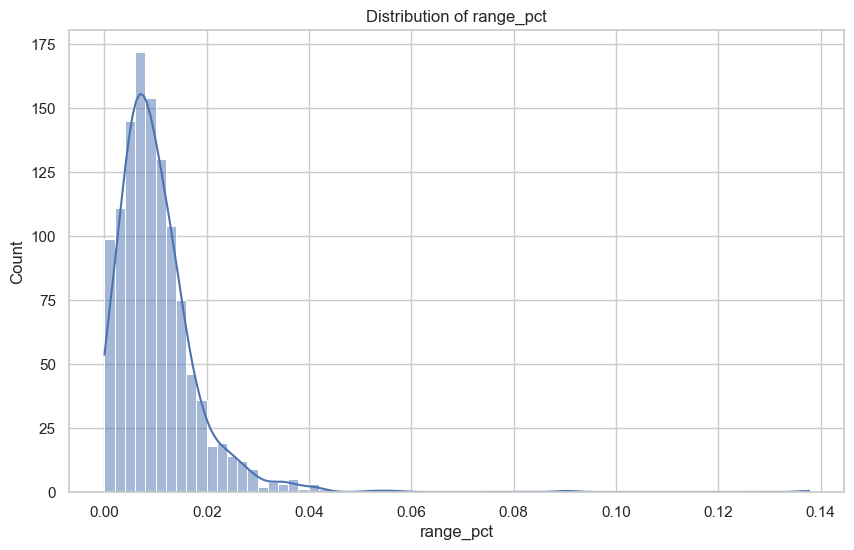

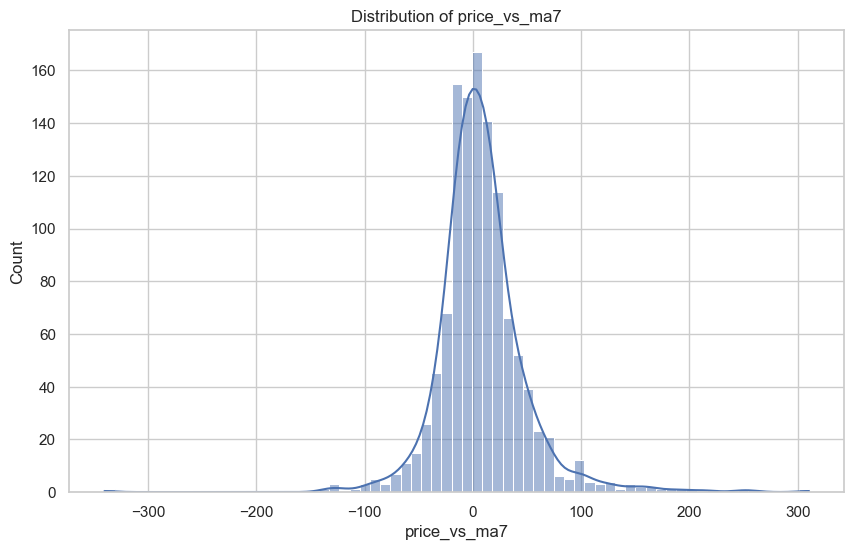

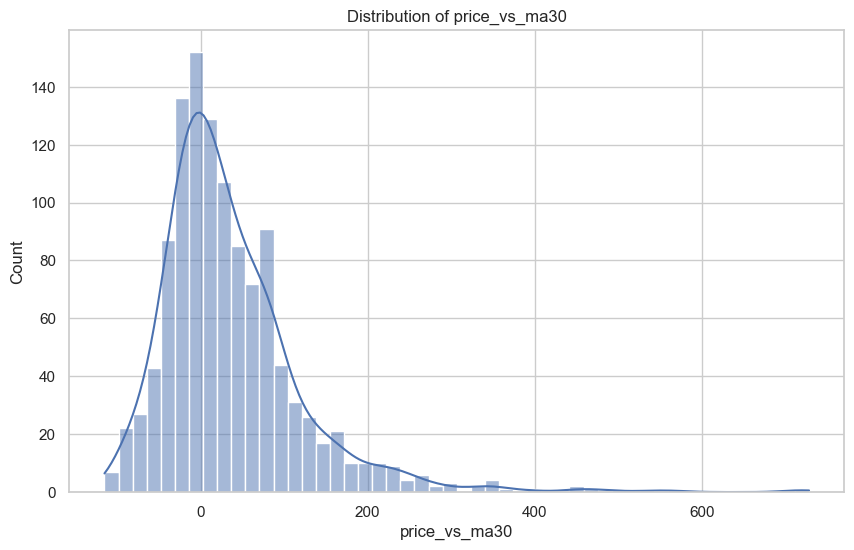

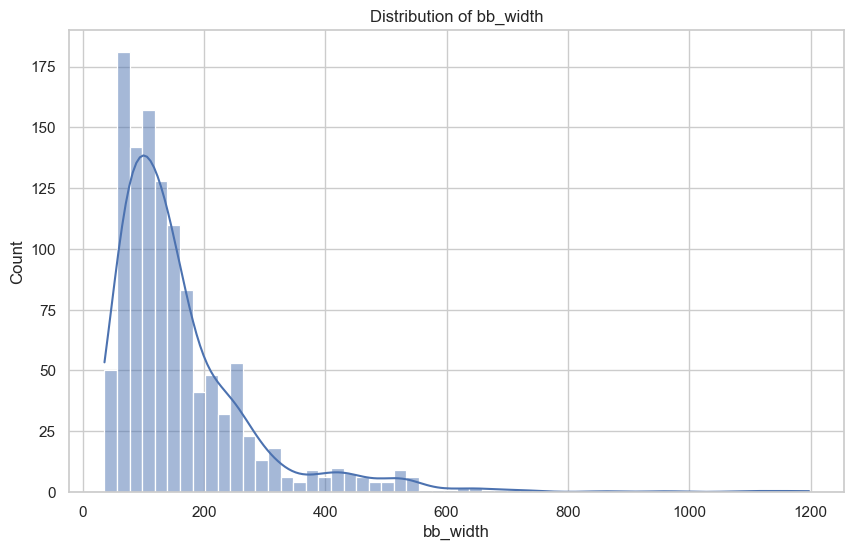

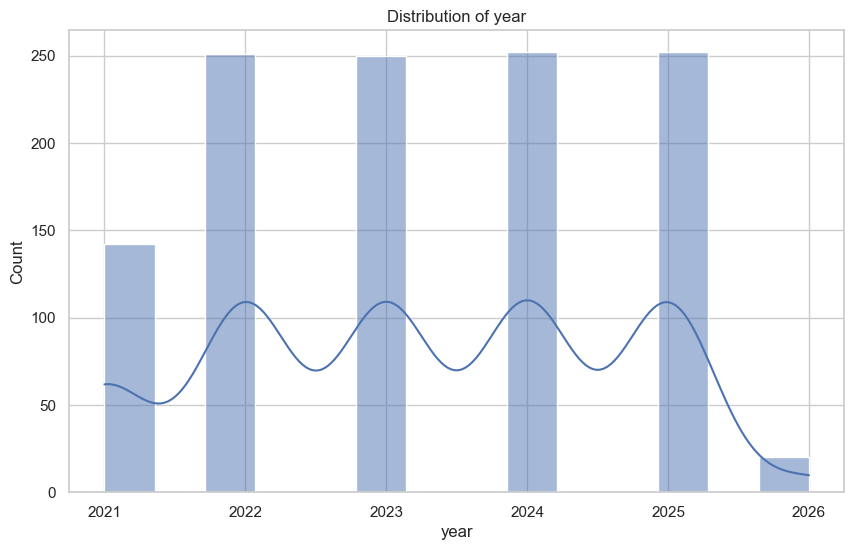

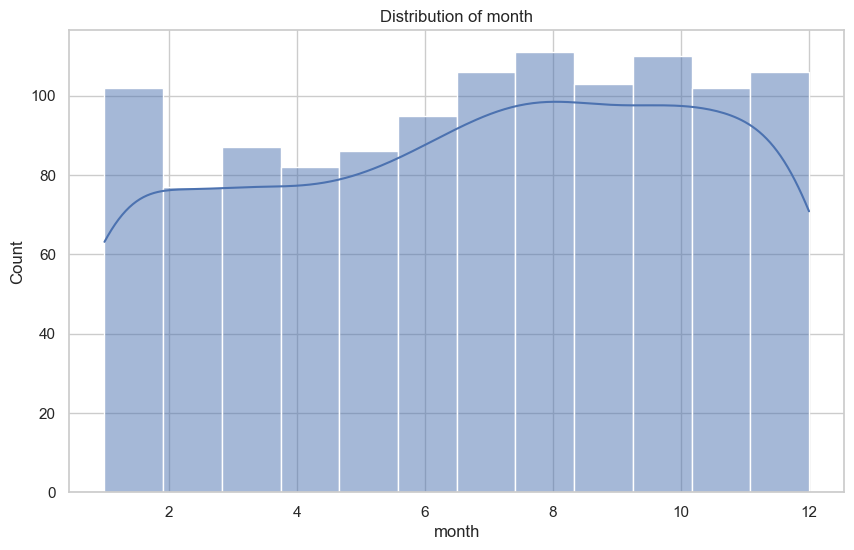

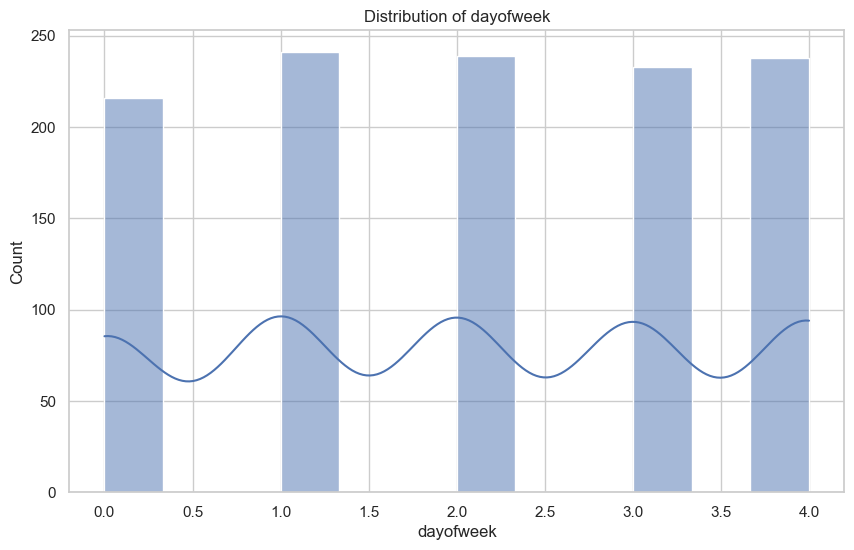

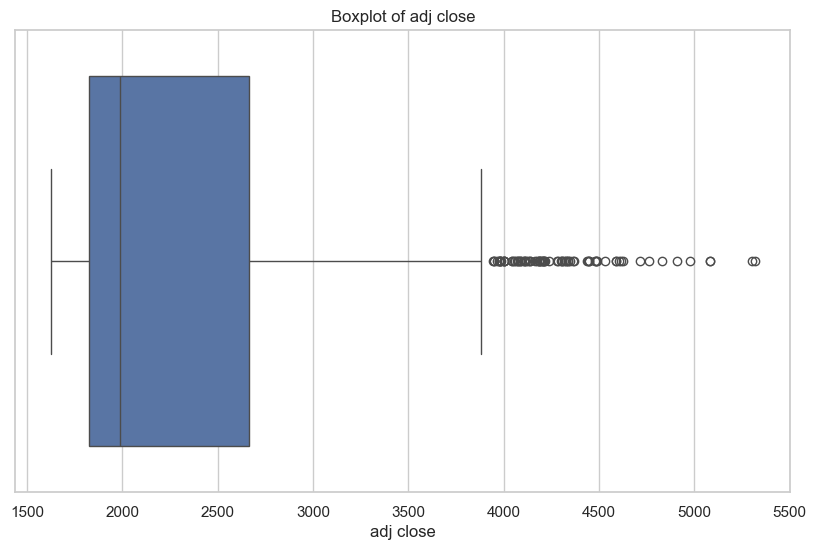

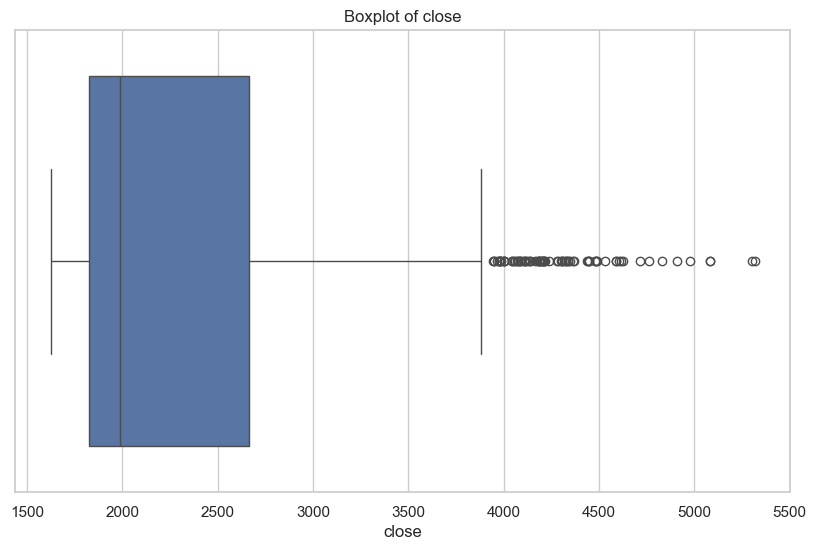

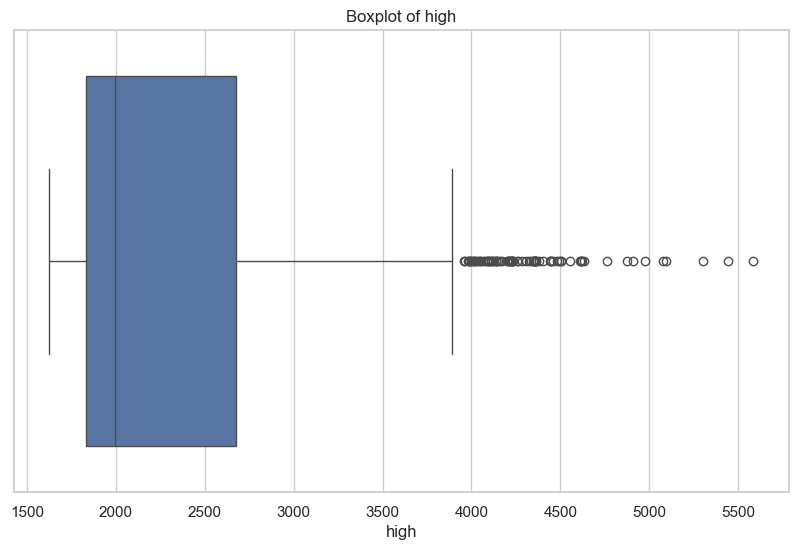

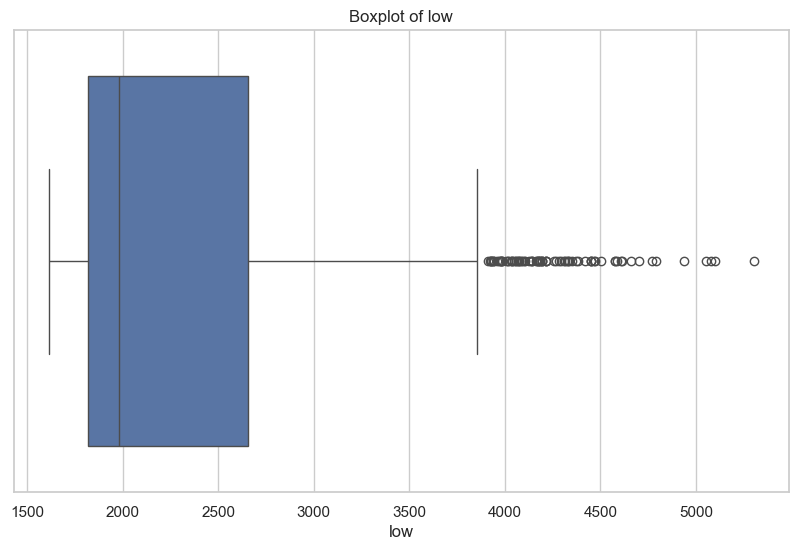

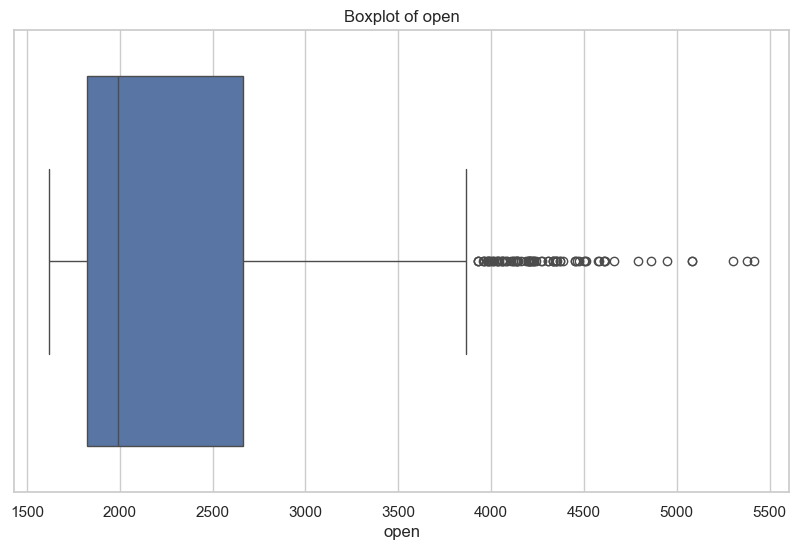

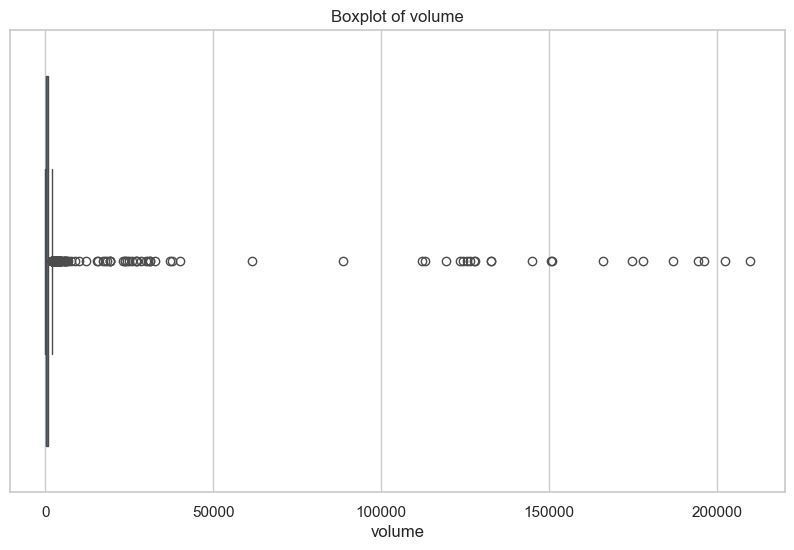

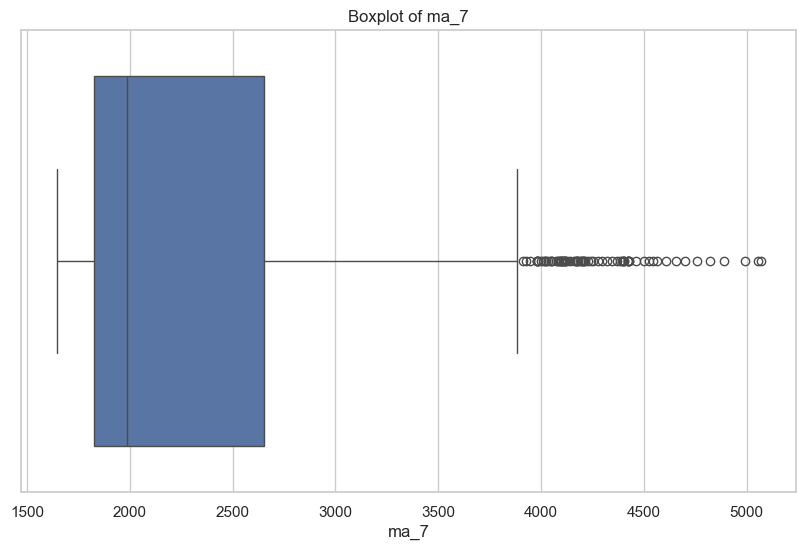

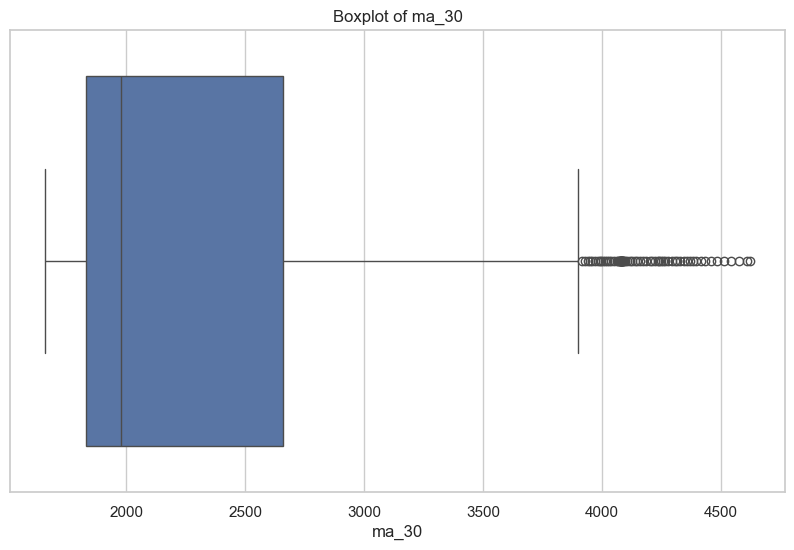

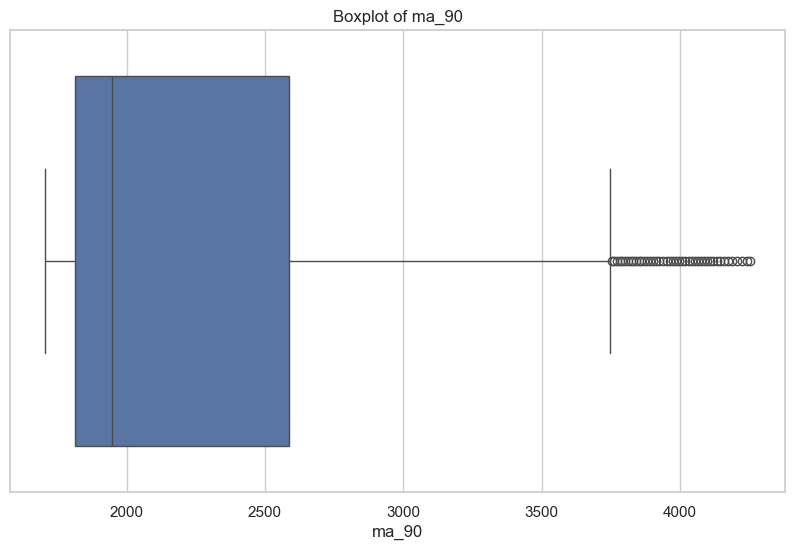

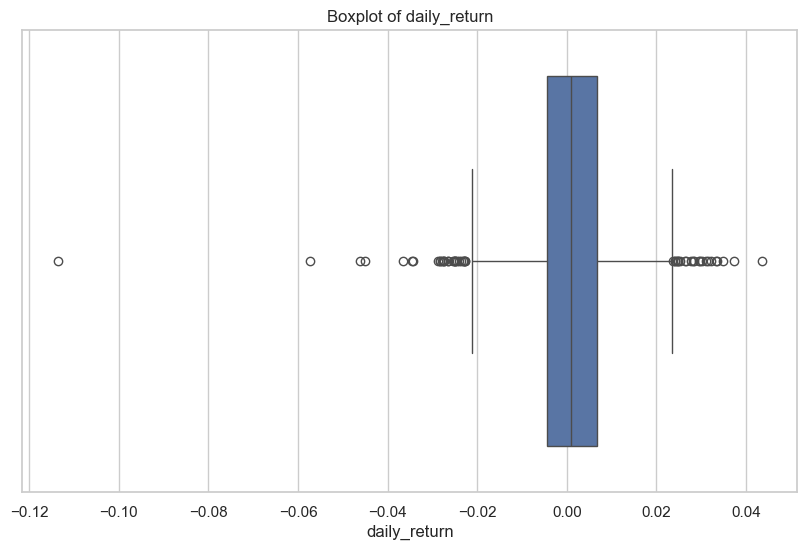

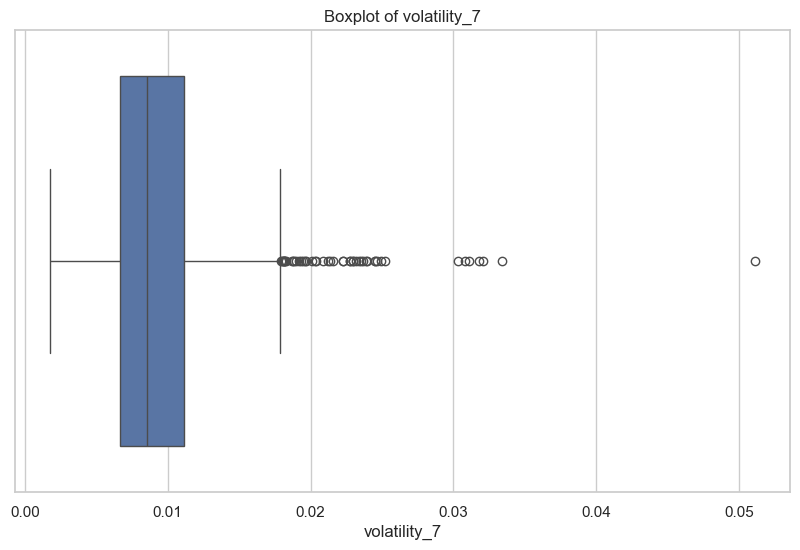

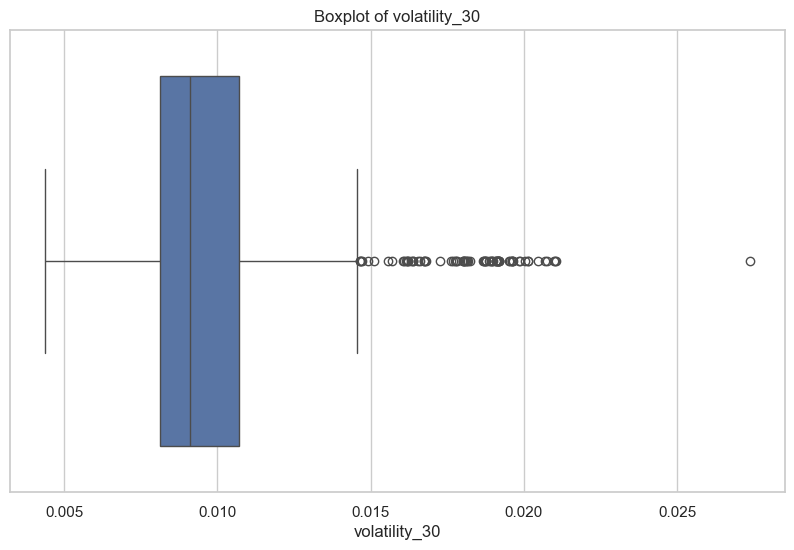

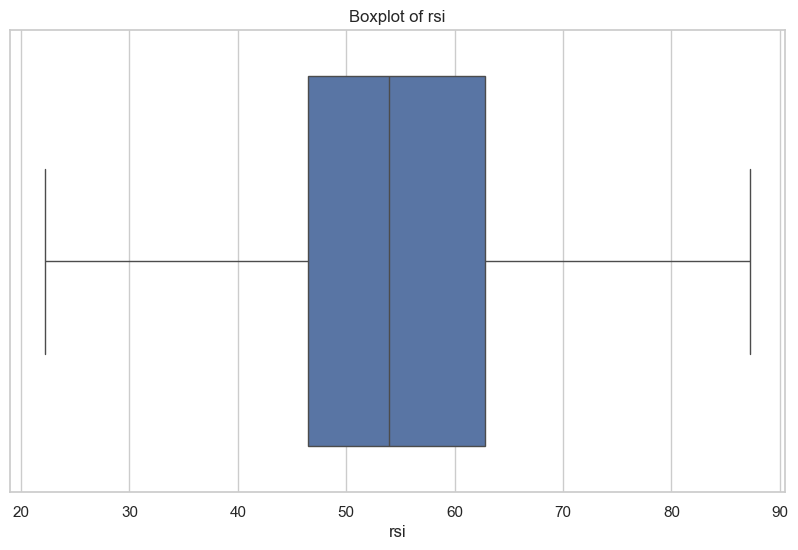

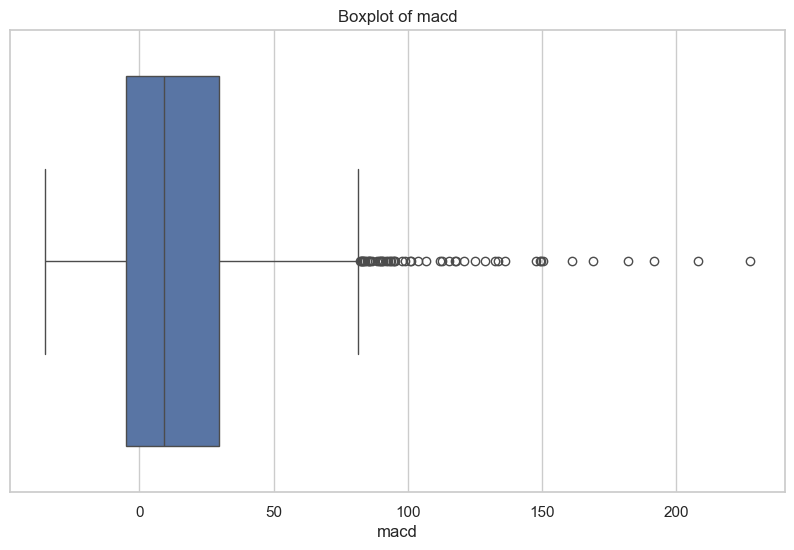

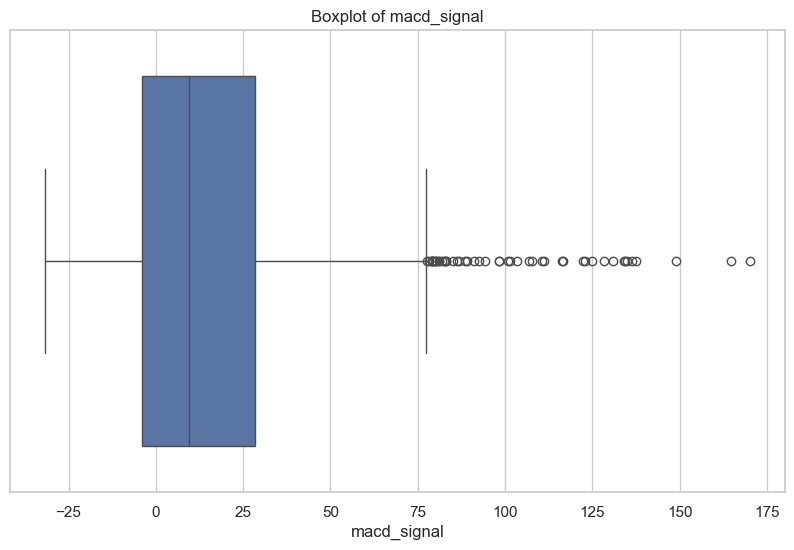

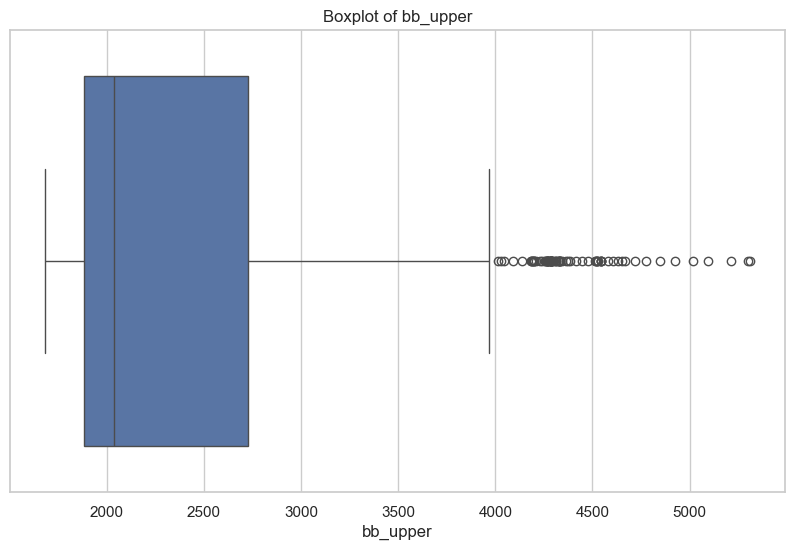

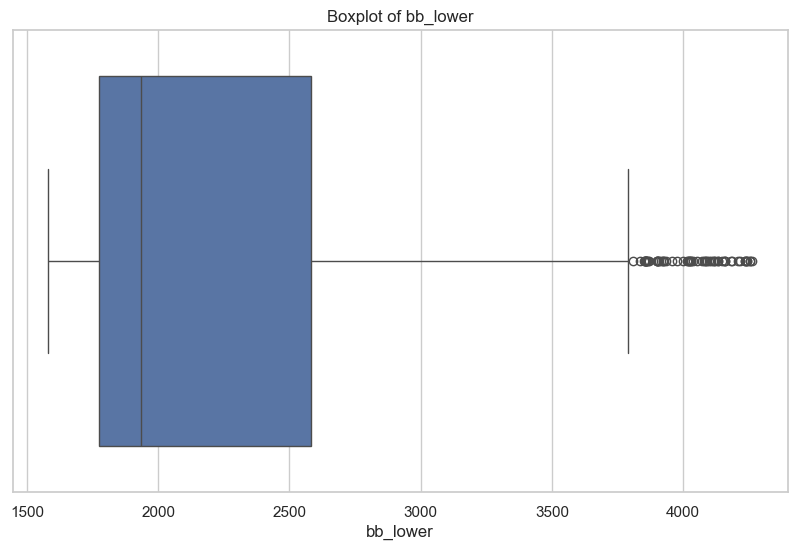

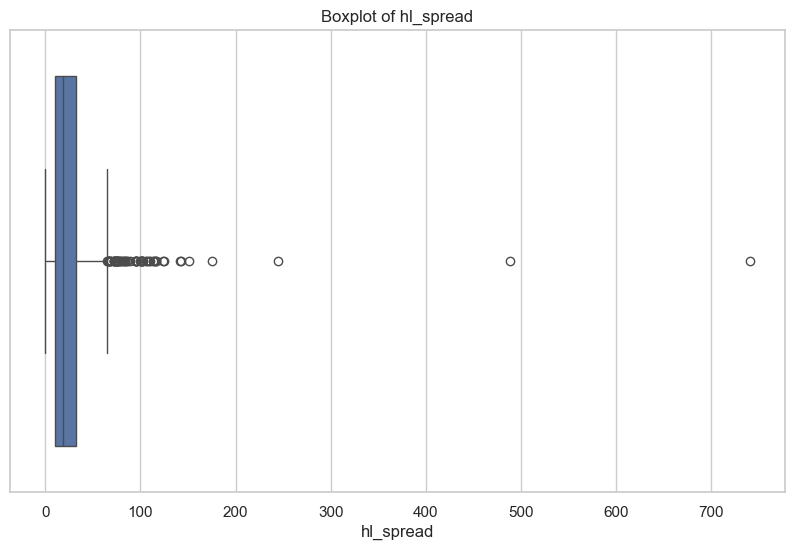

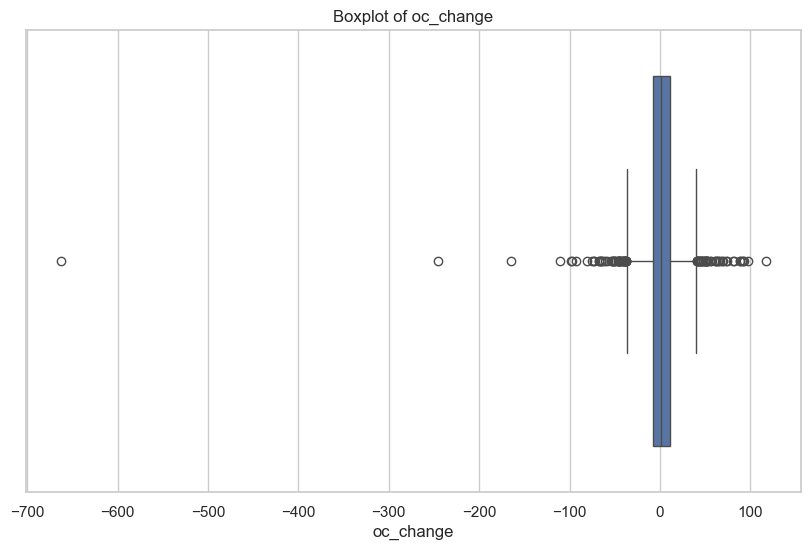

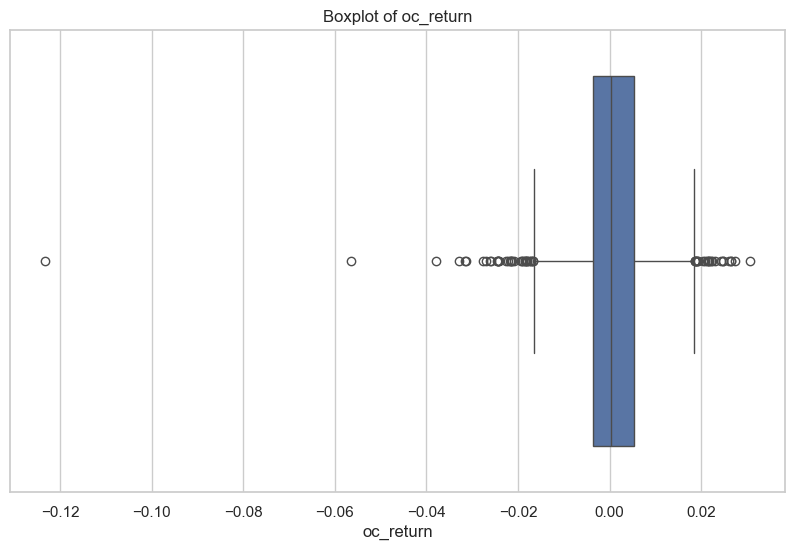

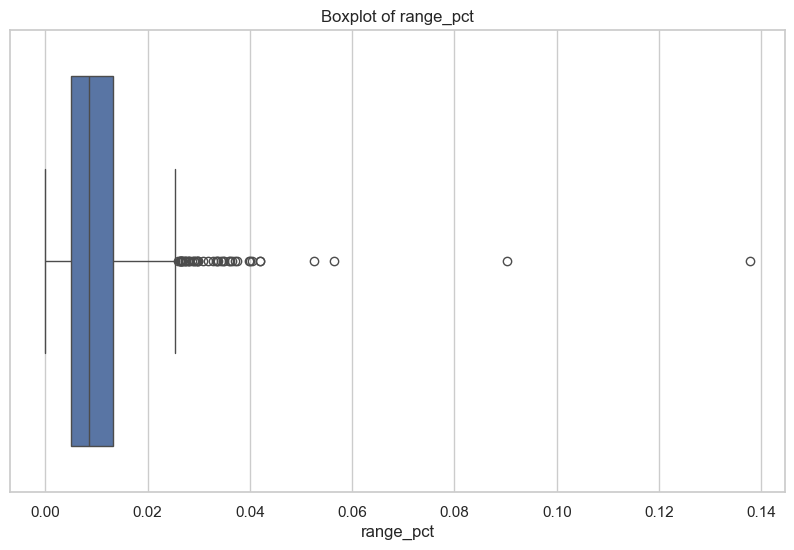

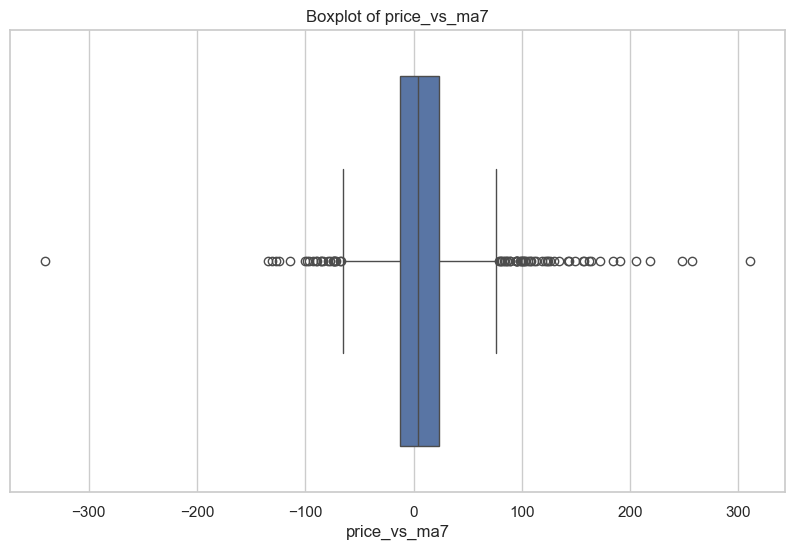

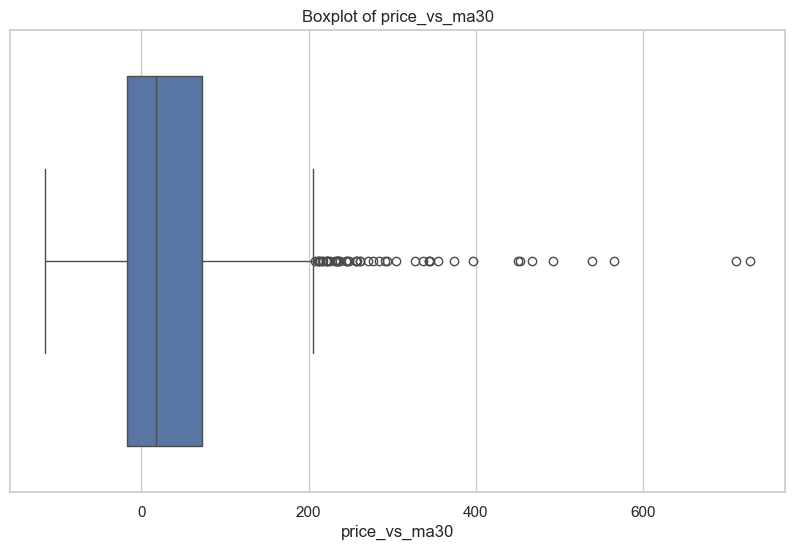

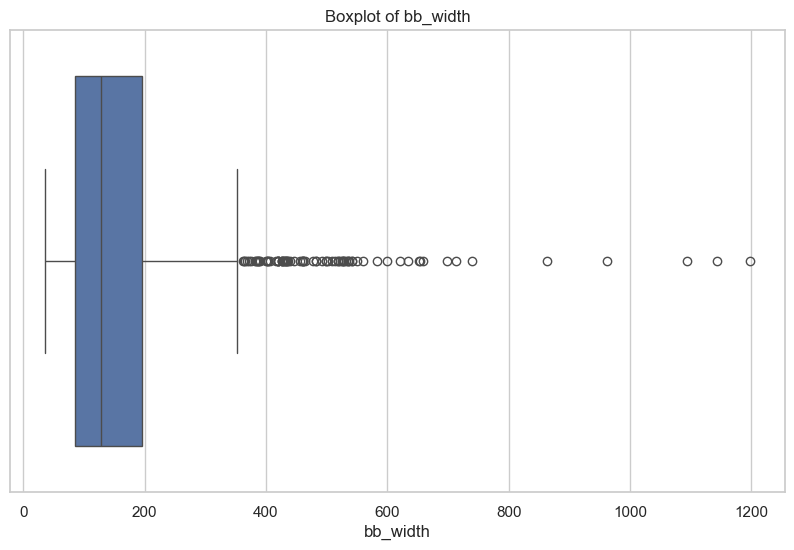

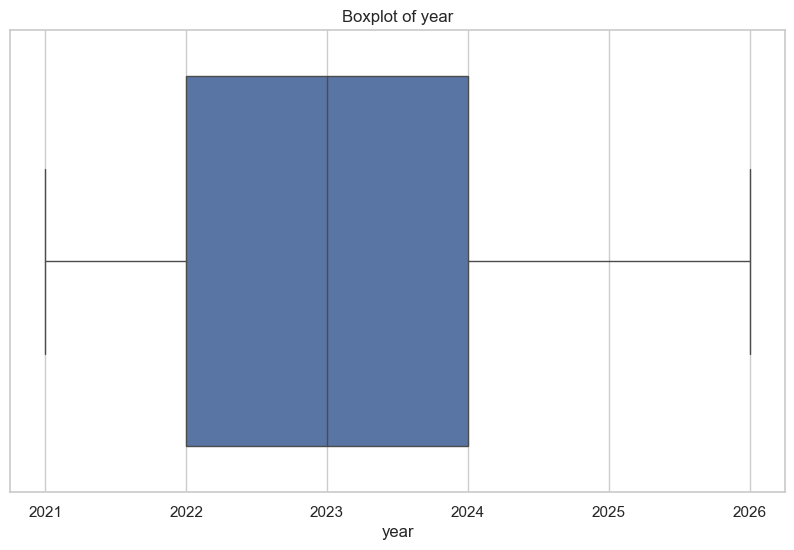

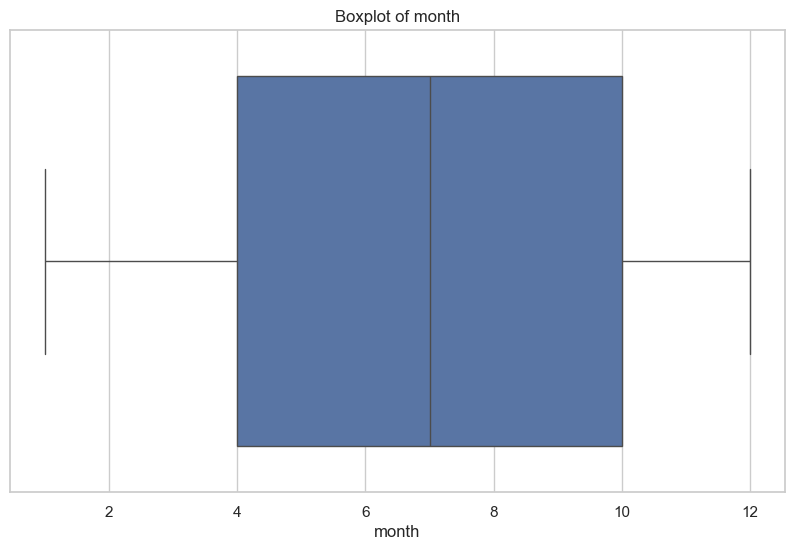

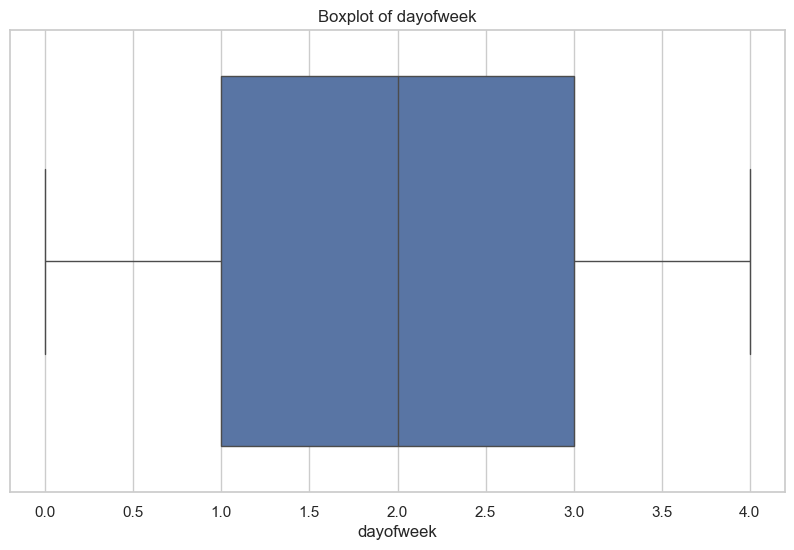

In [25]:
numeric_cols = gold.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure()
    sns.histplot(gold[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=gold[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

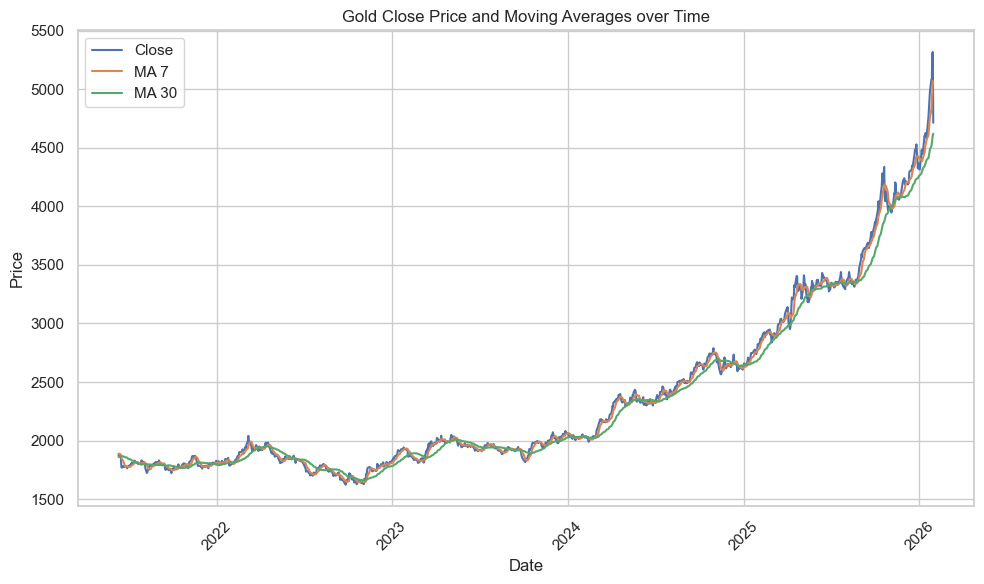

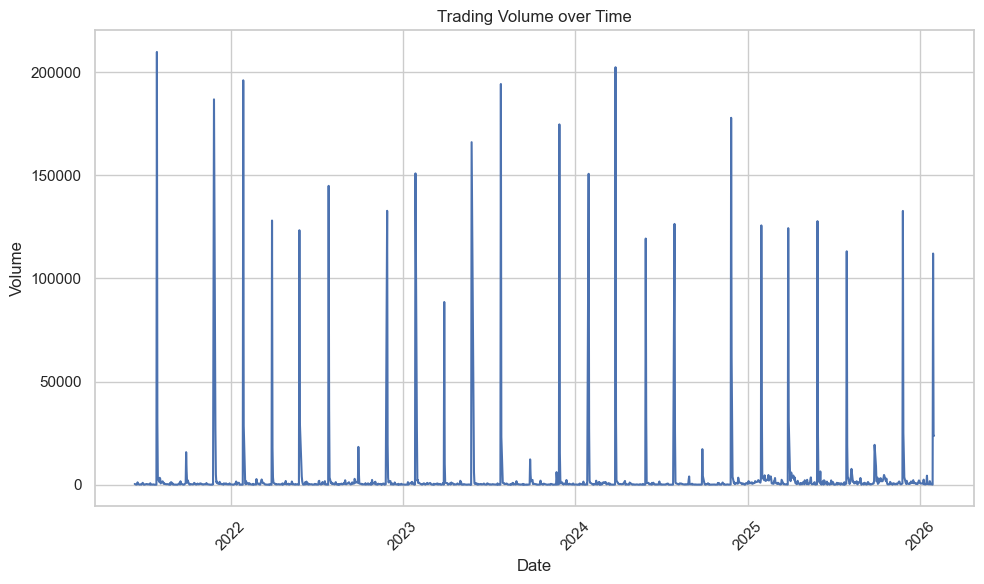

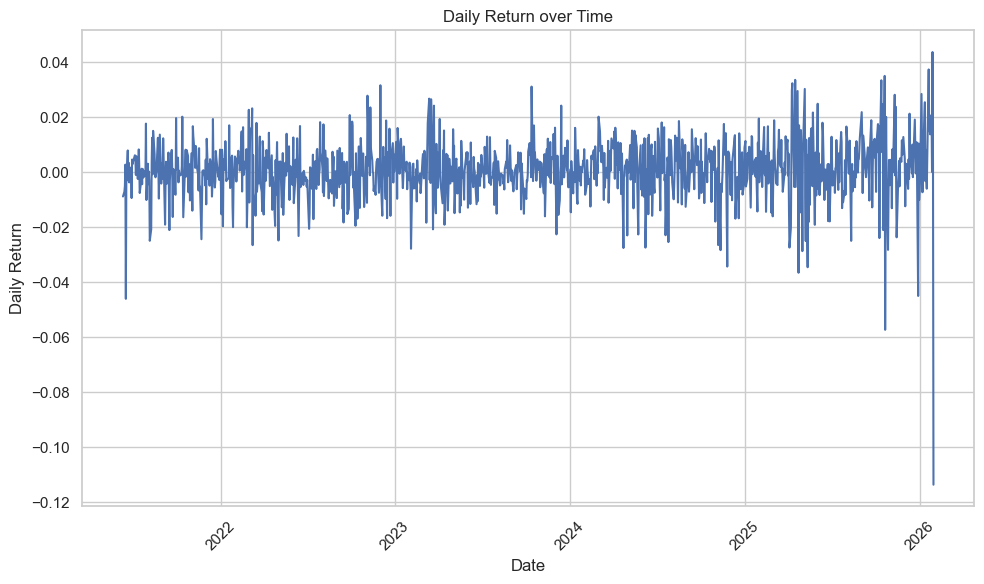

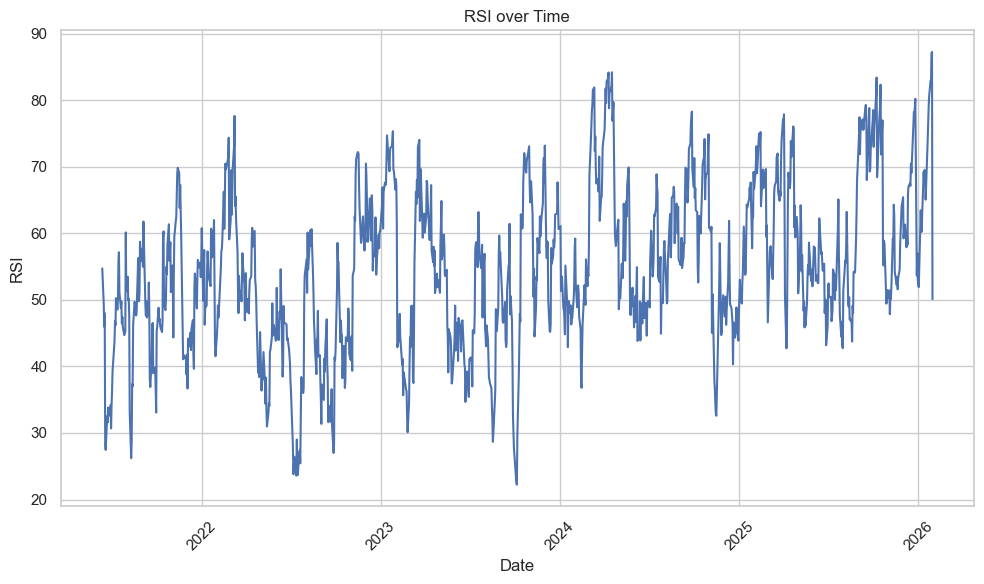

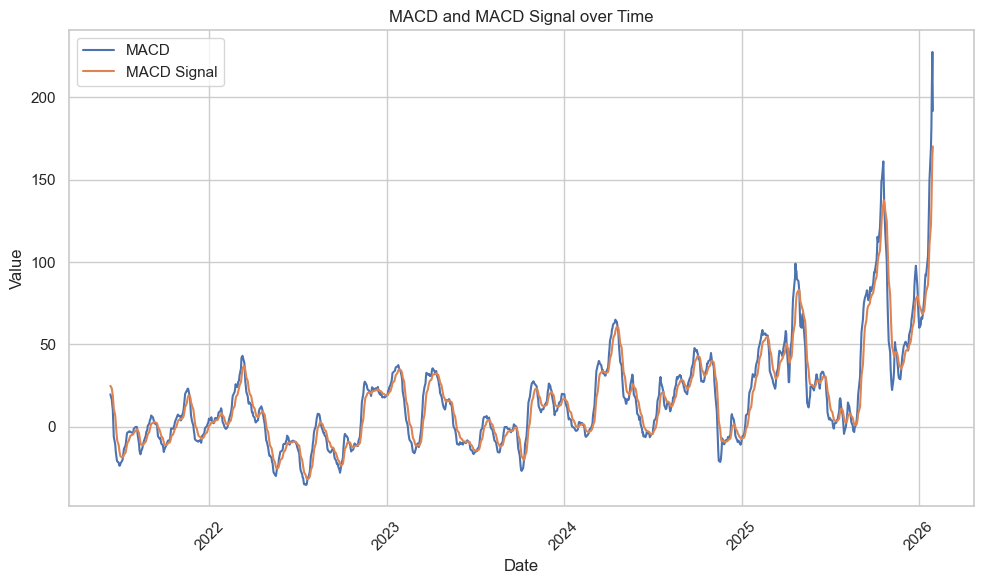

In [26]:
plt.figure()
sns.lineplot(data=gold, x="date", y="close", label="Close")
sns.lineplot(data=gold, x="date", y="ma_7", label="MA 7")
sns.lineplot(data=gold, x="date", y="ma_30", label="MA 30")
plt.xticks(rotation=45)
plt.title("Gold Close Price and Moving Averages over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
sns.lineplot(data=gold, x="date", y="volume")
plt.xticks(rotation=45)
plt.title("Trading Volume over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

plt.figure()
sns.lineplot(data=gold, x="date", y="daily_return")
plt.xticks(rotation=45)
plt.title("Daily Return over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.tight_layout()
plt.show()

plt.figure()
sns.lineplot(data=gold, x="date", y="rsi")
plt.xticks(rotation=45)
plt.title("RSI over Time")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.tight_layout()
plt.show()

plt.figure()
sns.lineplot(data=gold, x="date", y="macd", label="MACD")
sns.lineplot(data=gold, x="date", y="macd_signal", label="MACD Signal")
plt.xticks(rotation=45)
plt.title("MACD and MACD Signal over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

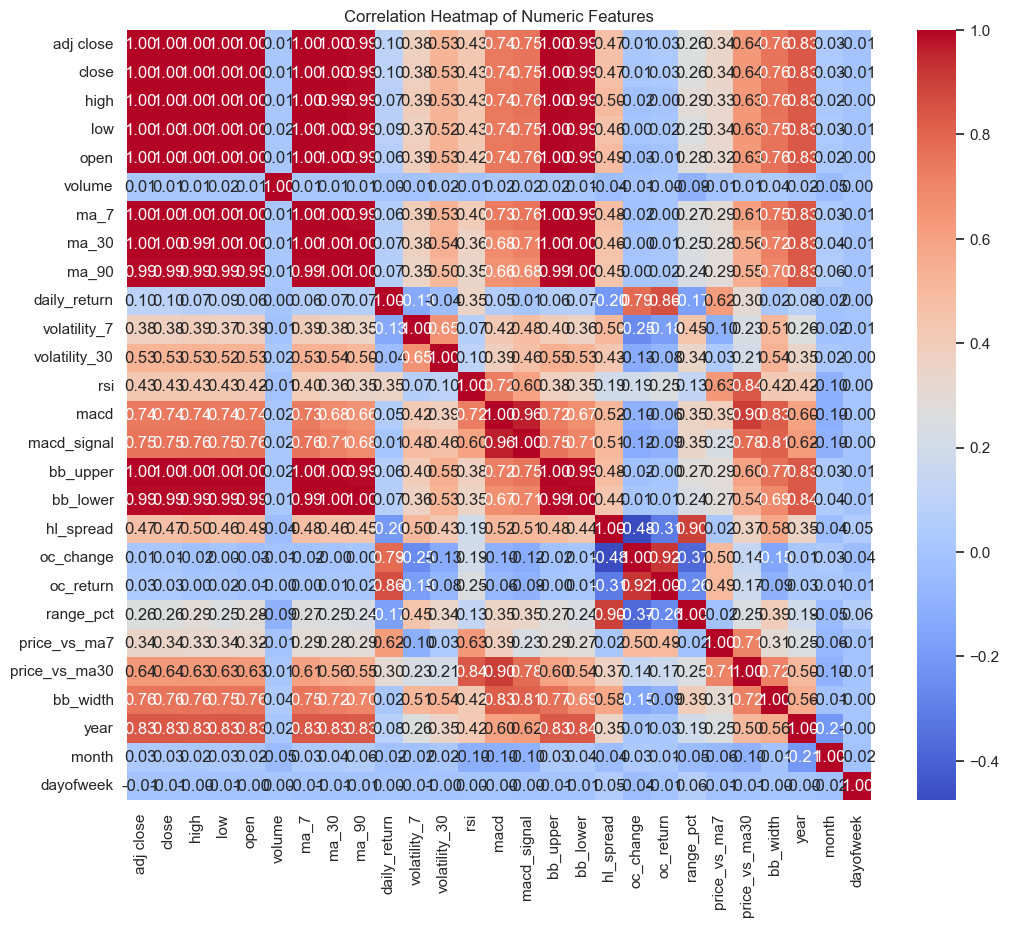

In [27]:
corr = gold[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

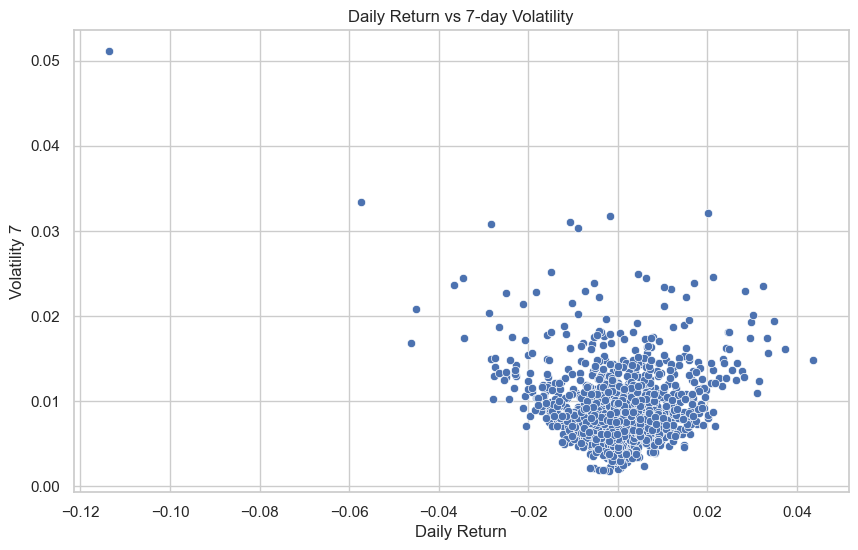

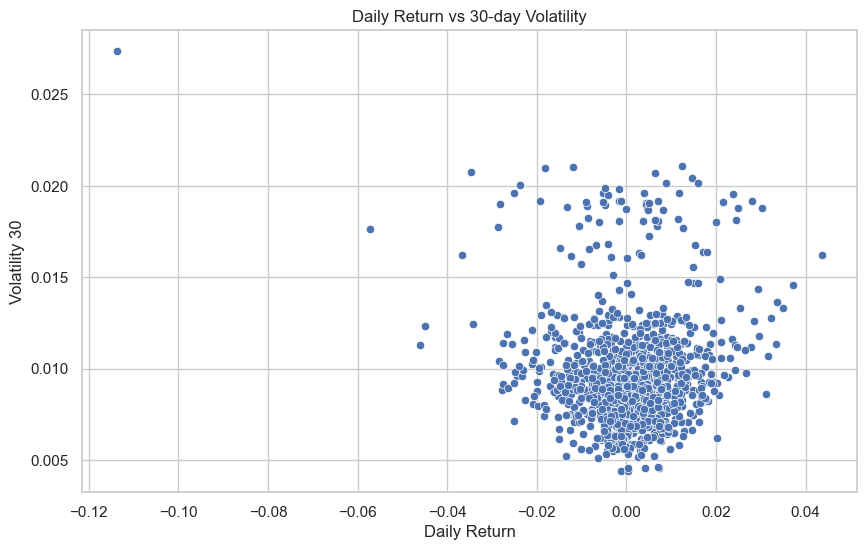

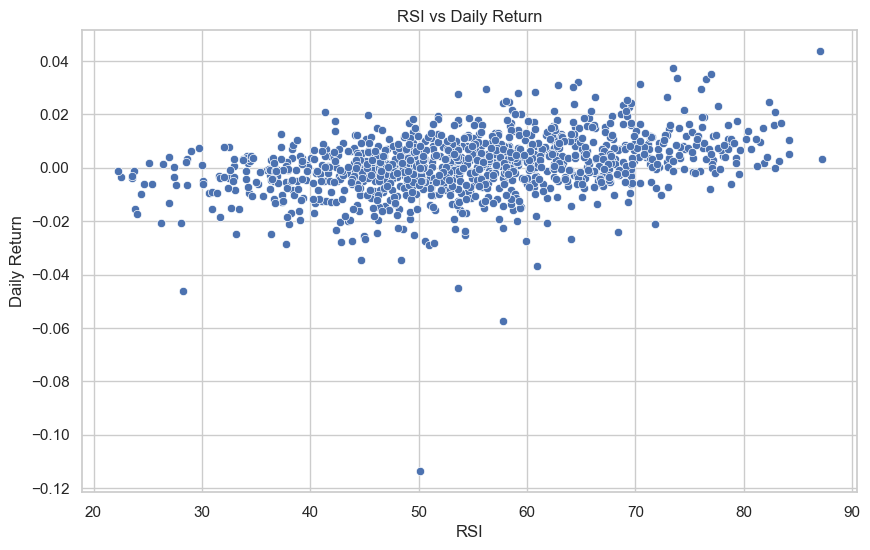

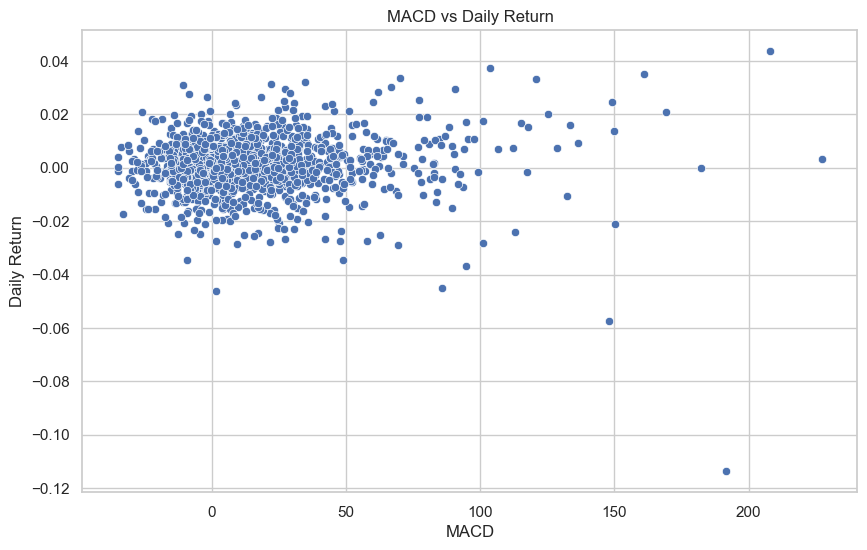

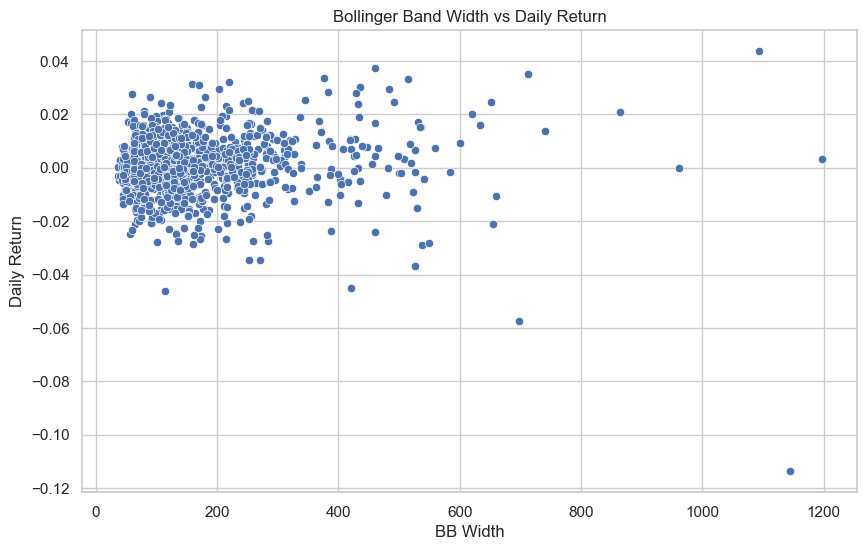

In [28]:
plt.figure()
sns.scatterplot(data=gold, x="daily_return", y="volatility_7")
plt.title("Daily Return vs 7-day Volatility")
plt.xlabel("Daily Return")
plt.ylabel("Volatility 7")
plt.show()

plt.figure()
sns.scatterplot(data=gold, x="daily_return", y="volatility_30")
plt.title("Daily Return vs 30-day Volatility")
plt.xlabel("Daily Return")
plt.ylabel("Volatility 30")
plt.show()

plt.figure()
sns.scatterplot(data=gold, x="rsi", y="daily_return")
plt.title("RSI vs Daily Return")
plt.xlabel("RSI")
plt.ylabel("Daily Return")
plt.show()

plt.figure()
sns.scatterplot(data=gold, x="macd", y="daily_return")
plt.title("MACD vs Daily Return")
plt.xlabel("MACD")
plt.ylabel("Daily Return")
plt.show()

plt.figure()
sns.scatterplot(data=gold, x="bb_width", y="daily_return")
plt.title("Bollinger Band Width vs Daily Return")
plt.xlabel("BB Width")
plt.ylabel("Daily Return")
plt.show()

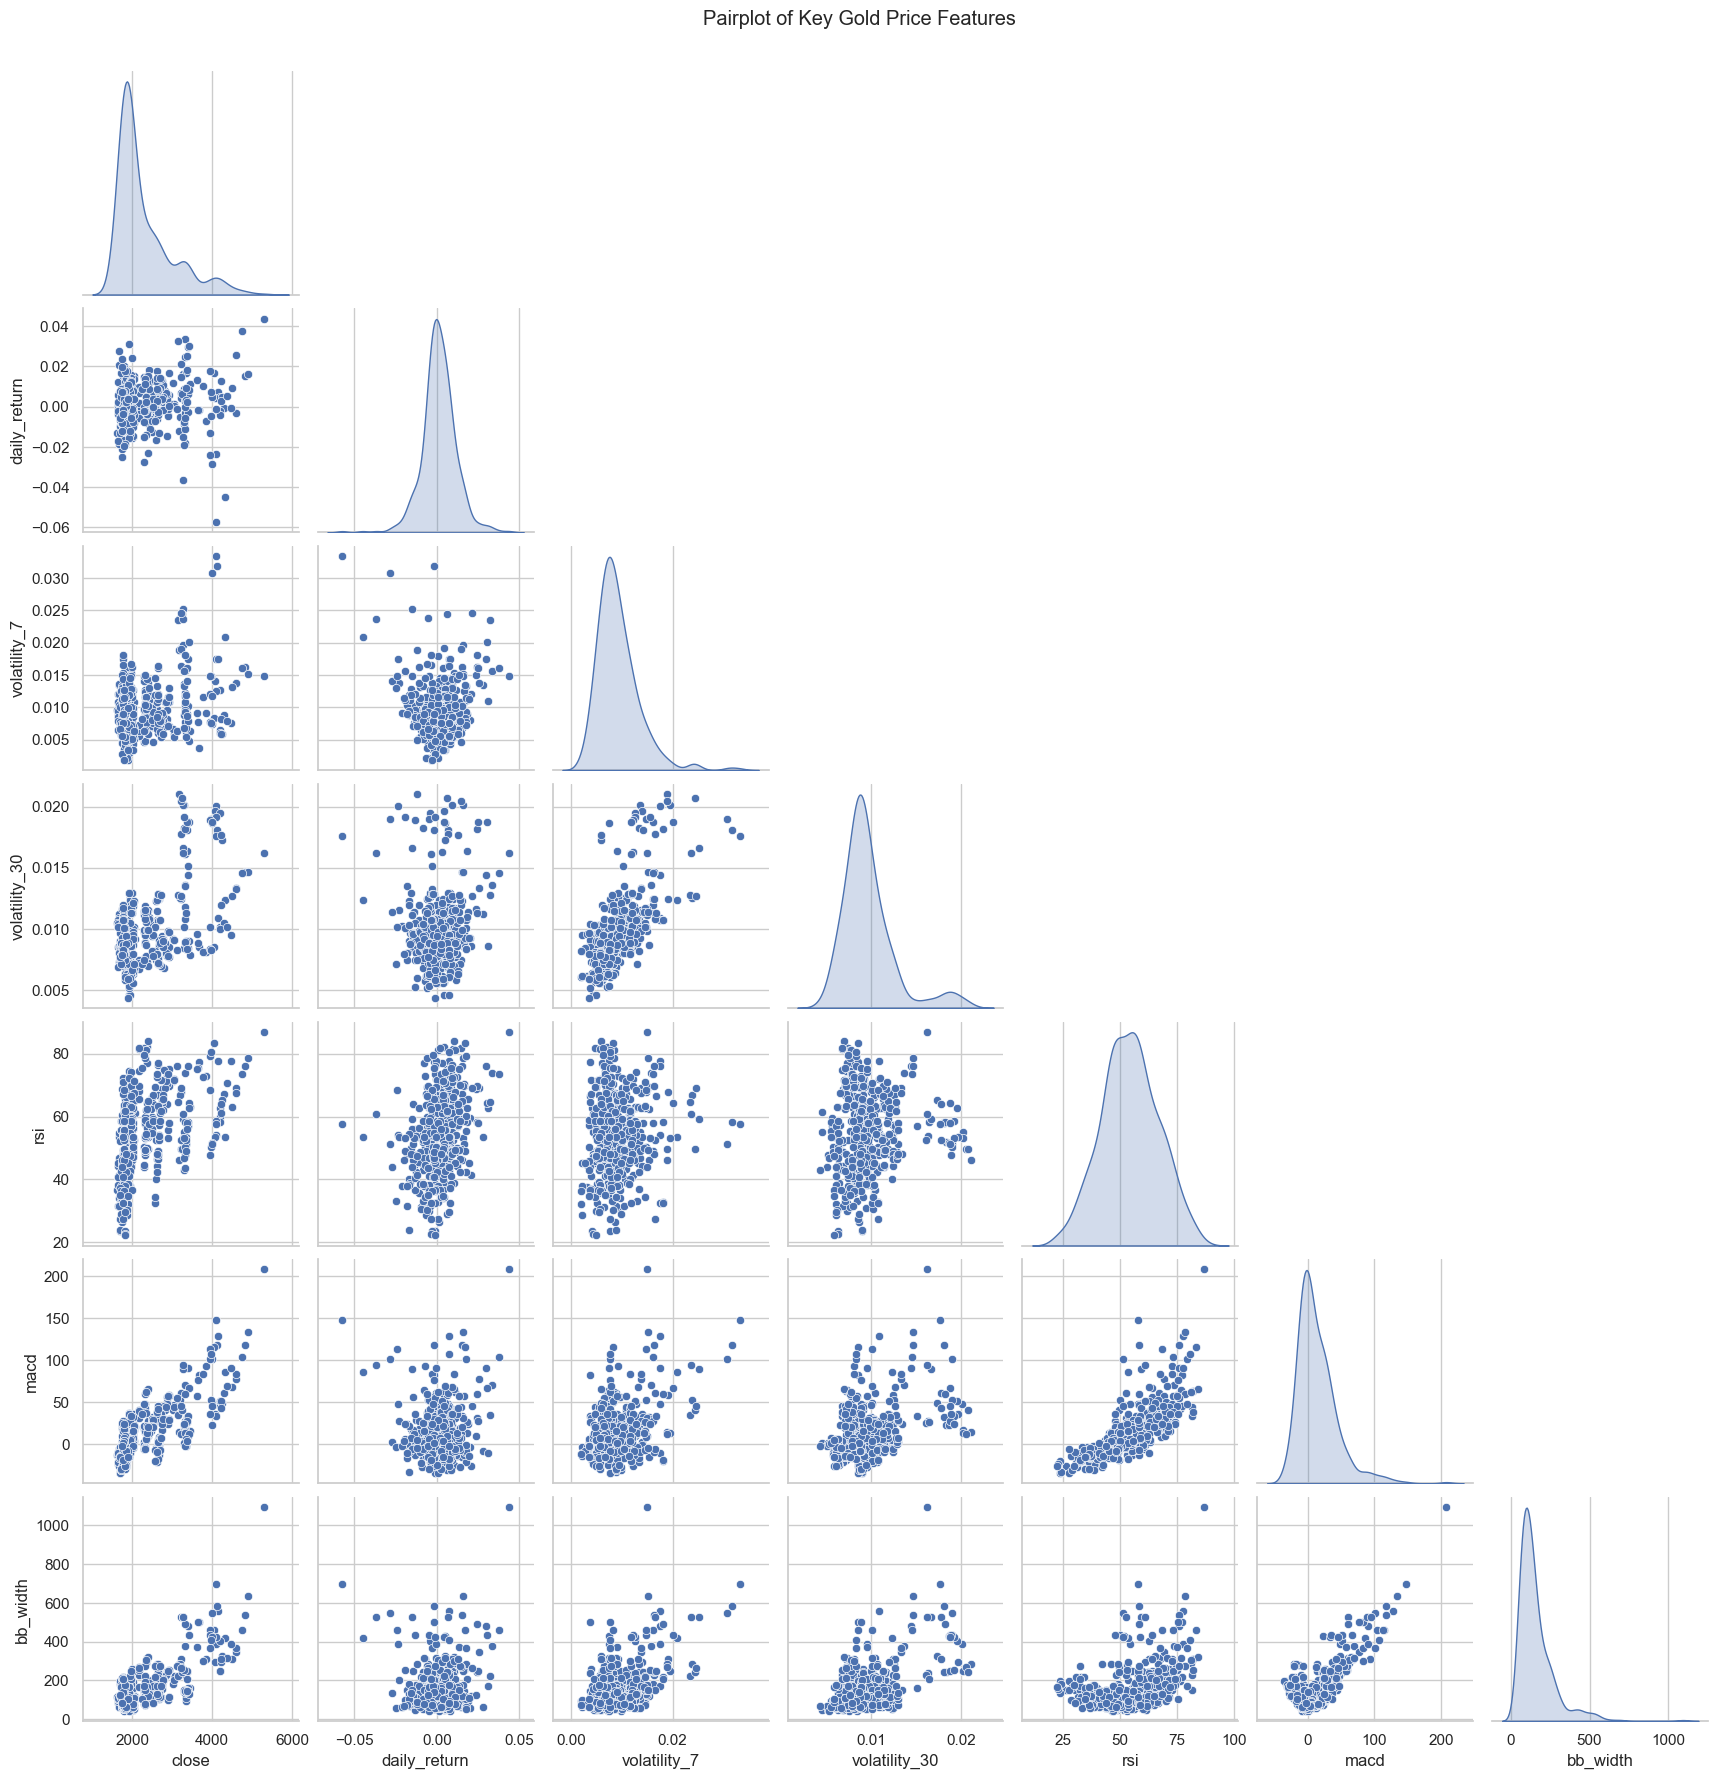

In [29]:
sample_gold = gold.sample(min(500, len(gold)), random_state=42)

sns.pairplot(
    sample_gold,
    vars=["close", "daily_return", "volatility_7", "volatility_30", "rsi", "macd", "bb_width"],
    corner=True,
    diag_kind="kde",
)
plt.suptitle("Pairplot of Key Gold Price Features", y=1.02)
plt.show()

## EDA Summary for Gold Price Forecasting Dataset

**Dataset Overview**  
- The dataset contains daily gold price and technical indicator data with columns such as `date`, `adj close`, `close`, `high`, `low`, `open`, `volume`, moving averages (`ma_7`, `ma_30`, `ma_90`), volatility measures (`volatility_7`, `volatility_30`), `daily_return`, `rsi`, `macd`, `macd_signal`, and Bollinger Band levels (`bb_upper`, `bb_lower`).  
- Additional engineered features include intraday high-low spread (`hl_spread`), open-close change and return (`oc_change`, `oc_return`), relative trading range (`range_pct`), deviations from moving averages (`price_vs_ma7`, `price_vs_ma30`), Bollinger Band width (`bb_width`), and calendar encodings (`year`, `month`, `dayofweek`).

**Data Quality and Structure**  
- After parsing `date` as a datetime field, the dataset appears to be a continuous time series with no duplicate dates and minimal or no missing values in the core price and indicator columns.  
- Numeric summaries show that prices and indicators fall in reasonable ranges for gold, with moderate variation in closing prices and more pronounced variability in technical indicators like volatility and MACD.  
- The engineered features are well-defined for each observation and extend the dataset for richer modeling and analysis.

**Univariate Patterns**  
- Distributions of `close`, `high`, `low`, and `open` are roughly unimodal and somewhat right-skewed, reflecting periods where gold trades in higher price regimes.  
- `daily_return` is centered close to zero with fat tails, consistent with financial return series that have many small moves and occasional large jumps.  
- `volatility_7` and `volatility_30` highlight periods of calm versus turbulence in price movements, with most days having modest volatility but some clusters of elevated risk.  
- RSI values are mostly in the neutral to moderately overbought/oversold zones, with relatively few extreme RSI readings.

**Time Series Dynamics**  
- Line plots of `close` alongside `ma_7` and `ma_30` show how short- and medium-term trends evolve, with crossovers between these series highlighting potential trend changes.  
- Volume over time exhibits spikes that coincide with notable price moves, indicating sessions of heightened trading activity.  
- `daily_return` time series shows volatility clustering: periods of relatively calm behavior followed by bursts of larger positive and negative returns.  
- RSI and MACD series over time illustrate momentum and trend strength, with MACD line and signal line interactions corresponding to shifts in price direction.

**Bivariate and Multivariate Relationships**  
- Correlation analysis shows strong positive correlations among price-related features (`close`, `adj close`, `high`, `low`, `open`) and between these and their moving averages.  
- `bb_width`, volatility measures, and `range_pct` tend to be positively related, indicating that wider trading ranges and larger price bands occur when volatility is higher.  
- Scatter plots of `daily_return` versus `volatility_7` and `volatility_30` reveal that larger returns (in absolute value) are more likely when volatility is elevated, consistent with risk–return dynamics.  
- RSI and MACD have meaningful, though not perfectly linear, relationships with returns, suggesting they capture aspects of trend and momentum that can be informative for forecasting or trading rules.  
- The pairplot of key features (`close`, `daily_return`, `volatility_7`, `volatility_30`, `rsi`, `macd`, `bb_width`) gives a compact view of joint distributions and linear relationships across important variables.

**Feature Encoding and Forecasting Readiness**  
- Calendar encodings (`year`, `month`, `dayofweek`) enable analysis of seasonal and weekday effects, such as whether volatility or returns differ by month or trading day.  
- Engineered features like `hl_spread`, `oc_return`, `range_pct`, and `price_vs_ma7` provide richer representations of daily behavior, including intraday range, momentum from open to close, and deviation from trend.  
- Together with existing technical indicators (moving averages, RSI, MACD, Bollinger Bands), these features form a comprehensive input space for time-series forecasting models or trading strategy backtests.

**Overall Understanding from this EDA**  
- The gold market in this sample exhibits typical financial time series characteristics: trending behavior, volatility clustering, and occasional sharp moves.  
- Price levels, volatility metrics, and momentum indicators are all interrelated, with periods of high volatility aligning with larger daily returns and wider trading ranges.  
- The cleaned and feature-enhanced dataset is now well-suited for further tasks such as supervised forecasting of future prices or returns, risk modeling, or exploration of rule-based trading strategies based on momentum and volatility signals.

In [30]:
df.shape, df.dtypes

((1167, 18),
 date              object
 adj close        float64
 close            float64
 high             float64
 low              float64
 open             float64
 volume             int64
 ma_7             float64
 ma_30            float64
 ma_90            float64
 daily_return     float64
 volatility_7     float64
 volatility_30    float64
 rsi              float64
 macd             float64
 macd_signal      float64
 bb_upper         float64
 bb_lower         float64
 dtype: object)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
adj close,1167.0,2363.105823,749.127289,1623.300049,1827.299988,1985.900024,2666.099976,5318.399902
close,1167.0,2363.105823,749.127289,1623.300049,1827.299988,1985.900024,2666.099976,5318.399902
high,1167.0,2375.595715,757.244374,1623.300049,1831.600037,1996.199951,2675.449951,5586.200195
low,1167.0,2349.989545,741.042344,1615.099976,1816.800049,1979.800049,2654.599976,5301.600098
open,1167.0,2362.322109,749.389242,1620.400024,1825.250000,1989.000000,2662.400024,5415.700195
volume,1167.0,4170.995716,21394.527815,0.000000,88.000000,297.000000,867.500000,209783.000000
ma_7,1167.0,2354.938862,735.998718,1643.671422,1827.585711,1986.785697,2654.771449,5070.914272
ma_30,1167.0,2327.283295,697.354115,1659.240002,1830.560004,1978.813334,2659.524996,4620.783317
ma_90,1167.0,2263.573357,620.008940,1705.499999,1813.691667,1948.046665,2588.156108,4252.532210
daily_return,1167.0,0.000840,0.010809,-0.113662,-0.004360,0.000945,0.006842,0.043643


In [32]:
df.isnull().sum()

date             0
adj close        0
close            0
high             0
low              0
open             0
volume           0
ma_7             0
ma_30            0
ma_90            0
daily_return     0
volatility_7     0
volatility_30    0
rsi              0
macd             0
macd_signal      0
bb_upper         0
bb_lower         0
dtype: int64

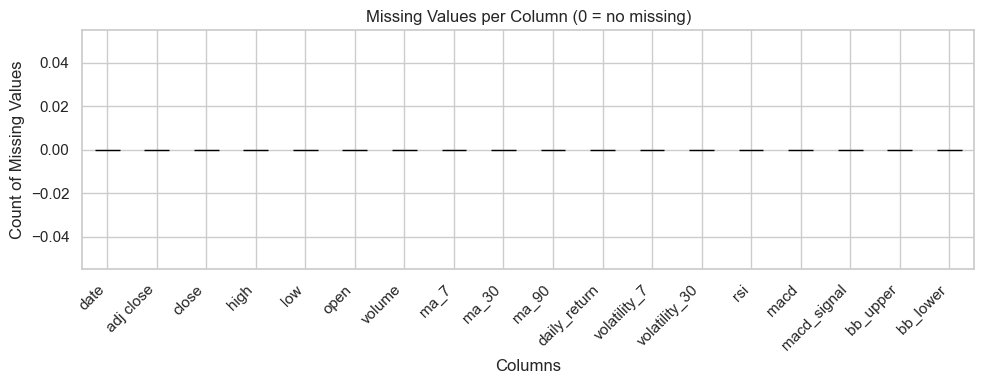

In [33]:
# Missing values visualization
null_counts = df.isnull().sum()
plt.figure(figsize=(10, 4))
null_counts.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Missing Values per Column (0 = no missing)")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

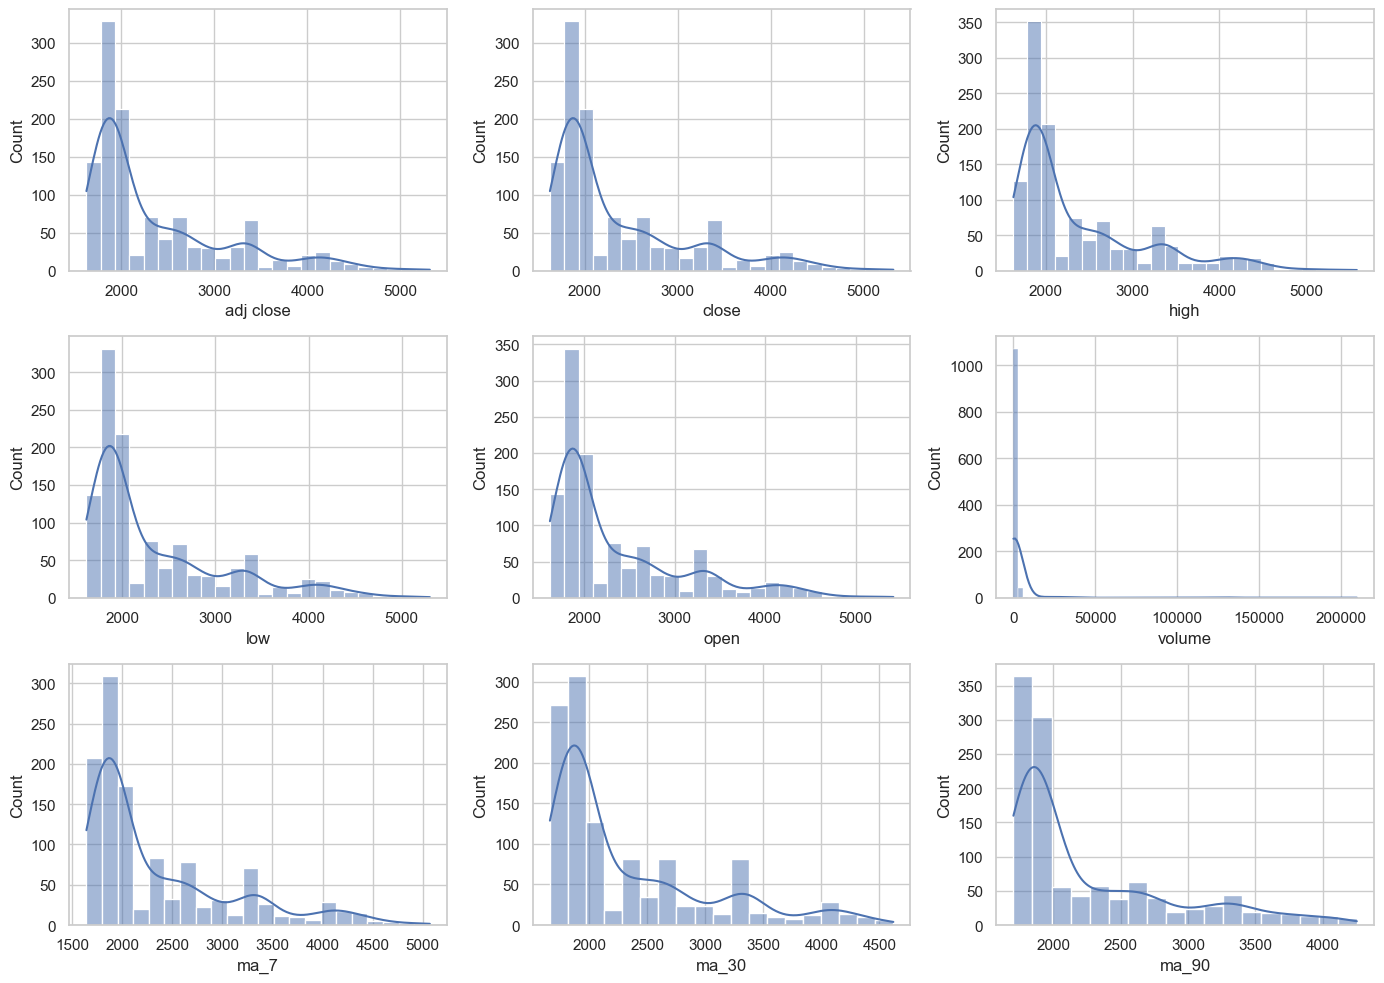

In [34]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols[:9]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

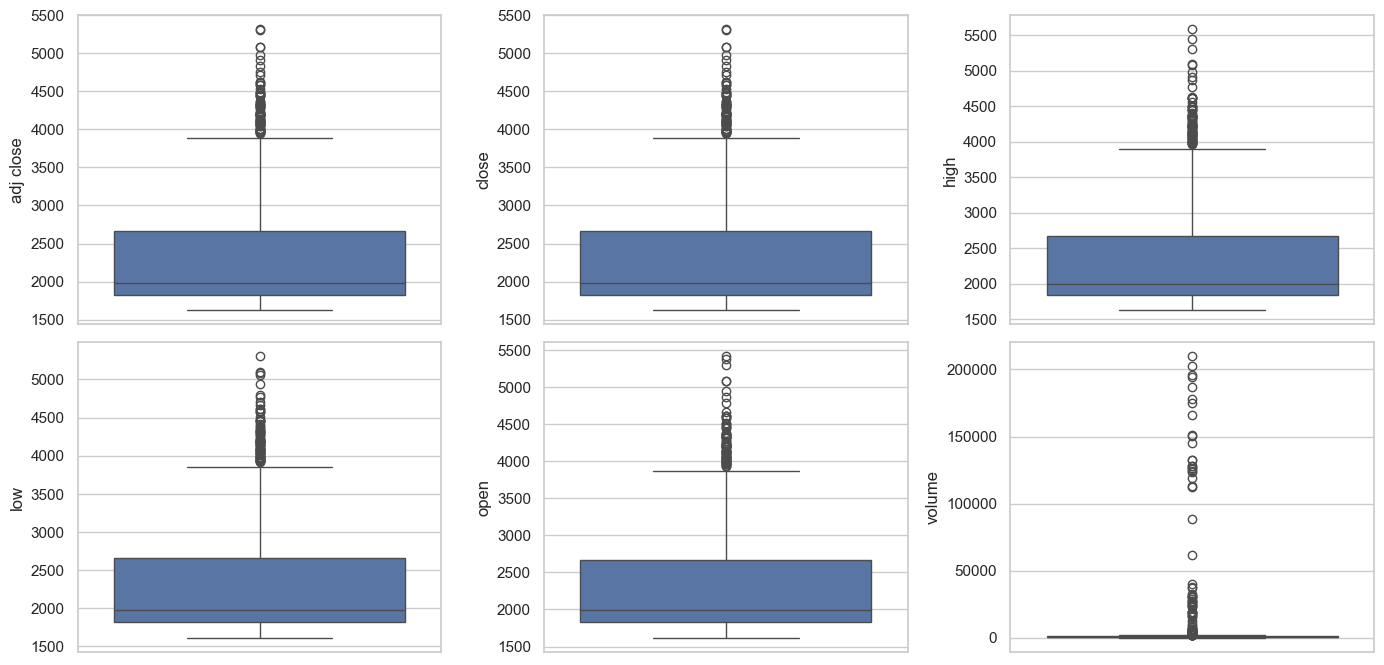

In [35]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(["adj close", "close", "high", "low", "open", "volume"]):
    if col in df.columns:
        plt.subplot(3, 3, i + 1)
        sns.boxplot(y=df[col])
        plt.ylabel(col)
plt.tight_layout()
plt.show()

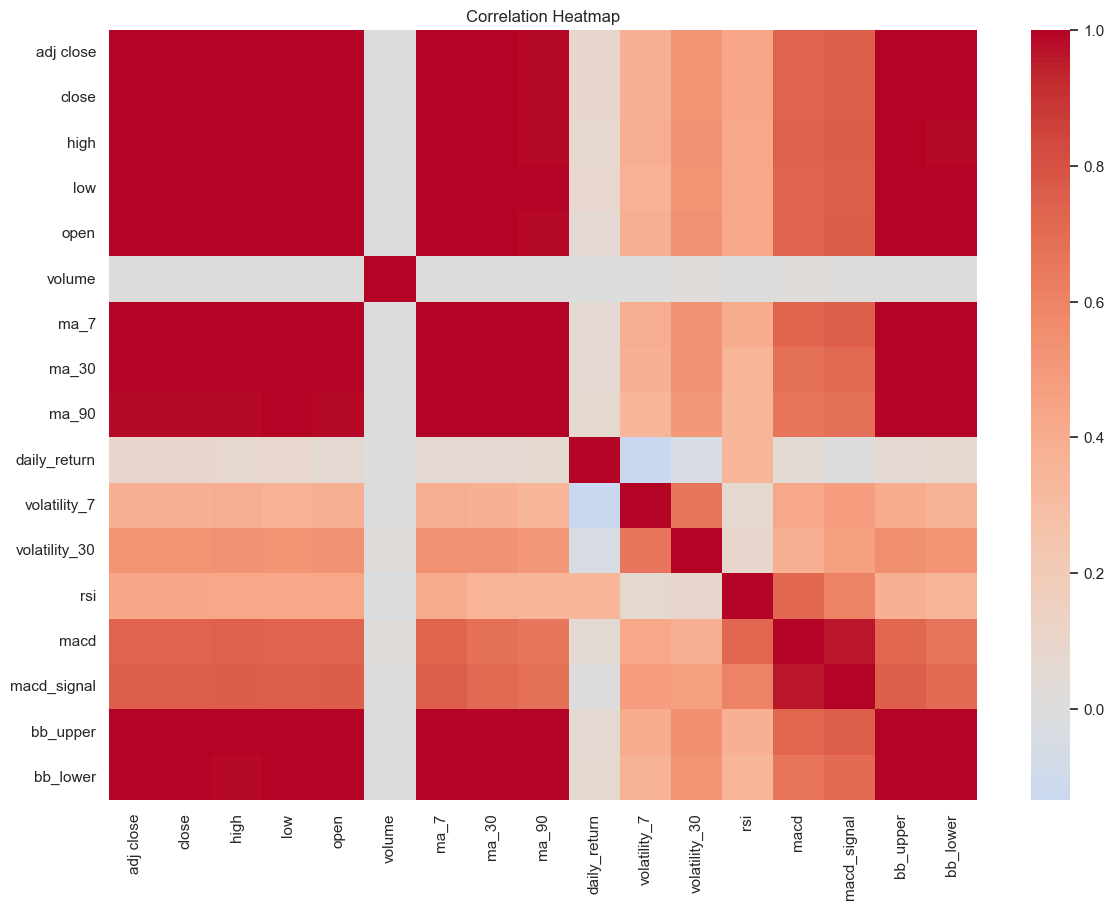

In [36]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

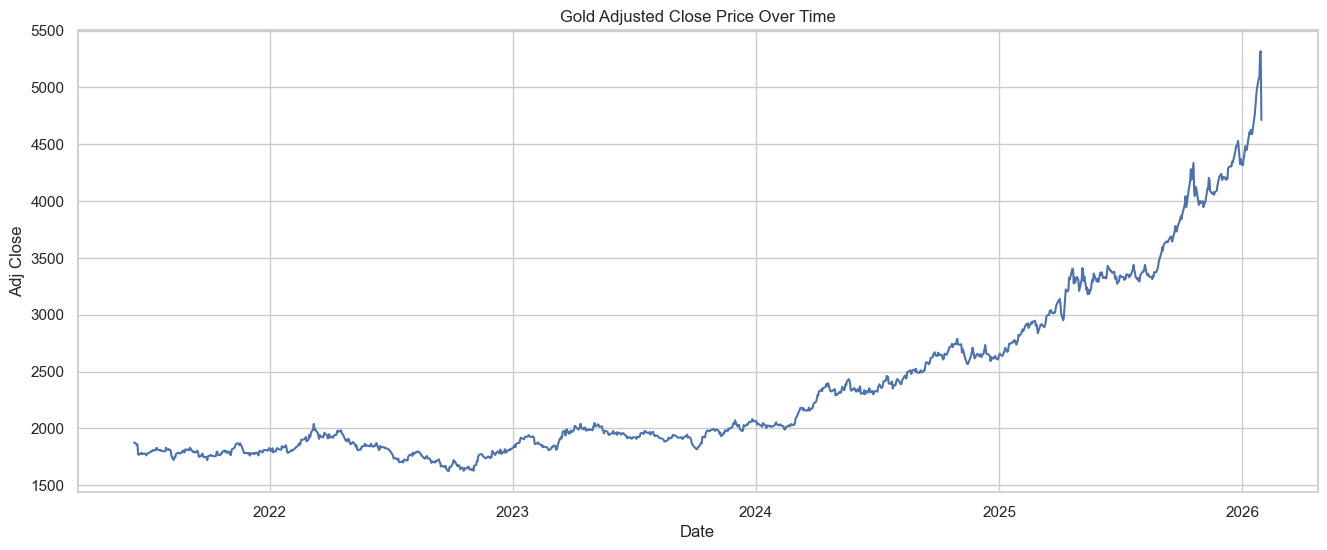

In [37]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="adj close", data=df)
plt.title("Gold Adjusted Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.show()

In [38]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["dayofweek"] = df["date"].dt.dayofweek
df["day_name"] = df["date"].dt.day_name()
df["is_bullish"] = (df["close"] > df["open"]).astype(int)
df[["date", "adj close", "open", "close", "year", "month", "dayofweek", "day_name", "is_bullish"]].head()

,date,adj close,open,close,year,month,dayofweek,day_name,is_bullish
0,2021-06-11,1877.400024,1900.900024,1877.400024,2021,6,4,Friday,0
1,2021-06-14,1864.000000,1866.199951,1864.000000,2021,6,0,Monday,0
2,2021-06-15,1854.500000,1866.400024,1854.500000,2021,6,1,Tuesday,0
3,2021-06-16,1859.500000,1859.400024,1859.500000,2021,6,2,Wednesday,1
4,2021-06-17,1773.800049,1811.800049,1773.800049,2021,6,3,Thursday,0


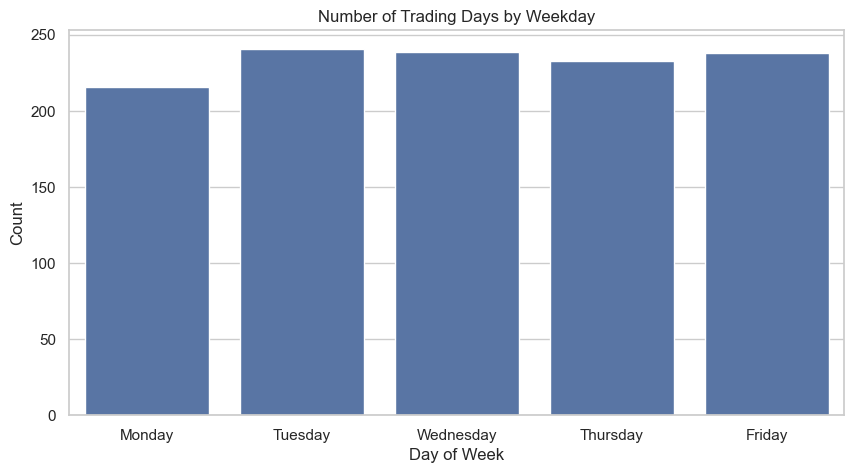

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(x="day_name", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.title("Number of Trading Days by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.show()

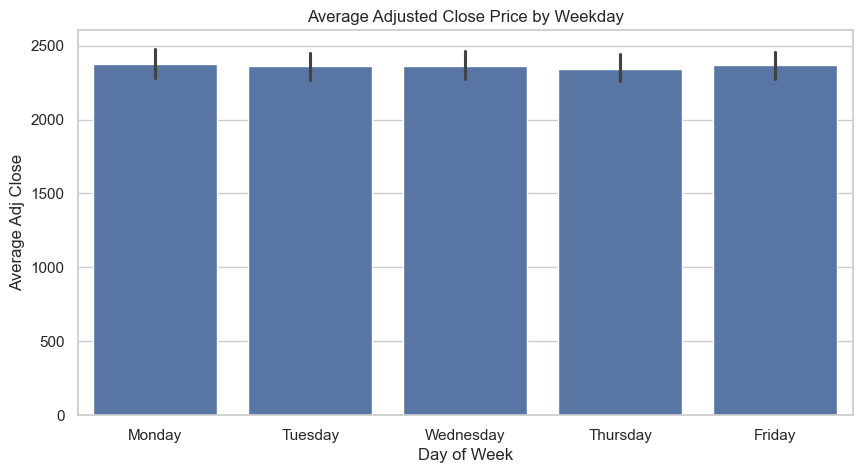

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(x="day_name", y="adj close", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.title("Average Adjusted Close Price by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Average Adj Close")
plt.show()

## Insights from the EDA

- The dataset contains daily gold price data with multiple technical indicators such as moving averages, volatility measures, RSI, MACD, and Bollinger Bands.
- Price-related features like `adj close`, `close`, `high`, `low`, and `open` are strongly positively correlated with each other and with their moving averages, indicating a stable relationship between spot prices and smoothed trends.
- Volatility and daily returns show higher variability and heavier tails, reflecting occasional sharp moves in gold prices.
- Boxplots reveal outliers in price and volume, corresponding to days with unusually high price swings or trading activity.
- The time series plot shows that gold prices move in clear trends and cycles rather than random noise, supporting the use of time-based features.
- Derived calendar features (`year`, `month`, `dayofweek`, `day_name`) and the `is_bullish` flag provide useful encodings and additional structure for any future modeling tasks.
- Weekday analysis suggests that average prices and trading frequency can differ slightly across days, which may be relevant for short-term trading strategies.
- Overall, the dataset is rich, mostly numeric, and well-suited for forecasting or trading models after handling any remaining missing values and scaling as needed.